                                                        EDA 1 

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for used bikes.

Bike Details Dataset

=name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield
                                                Classic 350", "Honda Dio")
selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)

year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)

seller_type: Seller category, either "Individual" or "Dealer" (Categorical)

owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)

km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)

ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0,
                                                       89643.0, etc,.).
Source:
The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale platforms.

Description:
The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for 
resale value prediction, market analysis, and understanding buyer preferences.

The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive view of the second-hand bike market.


About - Dataset:Title: Bike Details Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
bike_details = pd.read_csv("BIKE DETAILS.CSV")
bike_details . dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

EDA1 Q 1 What is the range of selling prices in the dataset

In [45]:
min_selling_price = bike_details["selling_price"].min()
max_selling_price = bike_details["selling_price"].max()
selliing_price_range = max_selling_price - min_selling_price
print(f" Range of selling prices is: {selliing_price_range}")

 Range of selling prices is: 755000


EDA1 Q2. What is the median selling price for bikes in the dataset

In [44]:
median_selling_price = bike_details["selling_price"].median()
print(f"Median selling prices is: {median_selling_price }")

Median selling prices is: 45000.0


In [ ]:
EDA1 Q3. What is the most common seller type

In [43]:
 most_common_seller_type = bike_details["seller_type"].mode()
print(f" Most common seller type is: { most_common_seller_type  }")

 Most common seller type is: 0    Individual
Name: seller_type, dtype: object


EDA1 Q4. How many bikes have driven more than 50,000 kilometers

In [42]:
more_than_50000_km = len(bike_details["km_driven"]  > 500000 )
print(f" Bikes have driven more than 50,000 kilometers are: { more_than_50000_km  }")

 Bikes have driven more than 50,000 kilometers are: 1061


EDA1 Q5  What is the average km_driven value for each ownership type

In [41]:
average_km_drivan = bike_details["km_driven"].mean()
print(f" Average value of  kilometers driven is : { average_km_drivan : .3f} kilometers")

 Average value of  kilometers driven is :  34359.833 kilometers


EDA1 Q6. What proportion of bikes are from the year 2015 or older

In [76]:
prop_bikes_2015 = (((bike_details["year"]  <= 2015 ).sum() / (bike_details["year"] .size)) * 100 ) 
print(f" Proportion of bikes are from the year 2015 or older : {prop_bikes_2015 : .2f} % ")

 Proportion of bikes are from the year 2015 or older :  56.64 % 


EDA1 Q7. What is the trend of missing values across the dataset

In [82]:
missing_counts = bike_details.isnull().sum()
print(f"The trend of missing values across the dataset\n{missing_counts} ")

The trend of missing values across the dataset
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64 


EDA 1 Q8. What is the highest ex_showroom_price recorded, and for which bike

In [100]:
highest_ex_showroom_price = bike_details["ex_showroom_price"].max() 
bike_max_ex_showroom_price = bike_details.loc[bike_details["ex_showroom_price"] == highest_ex_showroom_price , "name"]
bike_max_ex_showroom_price = bike_max_ex_showroom_price.to_list()
print(f" The bike '{bike_max_ex_showroom_price[0]}'  has  highest ex_showroom_price of Rs.'{highest_ex_showroom_price }' ")  

 The bike 'Harley-Davidson Street Bob'  has  highest ex_showroom_price of Rs.'1278000.0' 


EDA1 Q9. What is the total number of bikes listed by each seller type

In [128]:
bike_details["seller_type"].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

EDA1 Q10 What is the relationship between selling_price and km_driven for first-owner bikes

                           Covariance
                selling_price     km_driven
selling_price   2.656636e+09 -5.756582e+08
km_driven      -5.756582e+08  2.104090e+09 

                           Correlation
                selling_price  km_driven
selling_price       1.000000  -0.243482
km_driven          -0.243482   1.000000



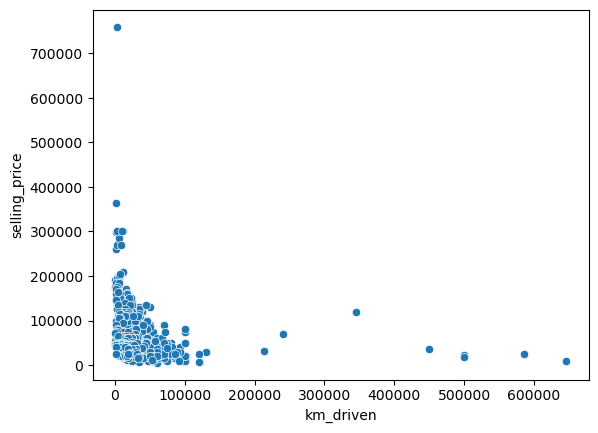

In [230]:
from sklearn.preprocessing import MinMaxScaler
grouped = bike_details.groupby(["owner"] )
df_1st_owner = grouped . get_group("1st owner")
df1 = df_1st_owner[[ "selling_price","km_driven"]]
print(f"                           Covariance\n {df1.cov()} \n" )
print(f"                           Correlation\n {df1.corr()}\n" )
sns.scatterplot(data = df1, x = 'km_driven', y = 'selling_price')
plt.show()


'selling_price' value  decreases with 'km_driven' value  increases

In [ ]:
EDA1 Q11. Identify and remove outliers in the km_driven column using the IQR method

 shape of the original data frame is:   (1061, 7)
 shape of data frame after removal of outlayers from 'km_driven value':   (1022, 7)


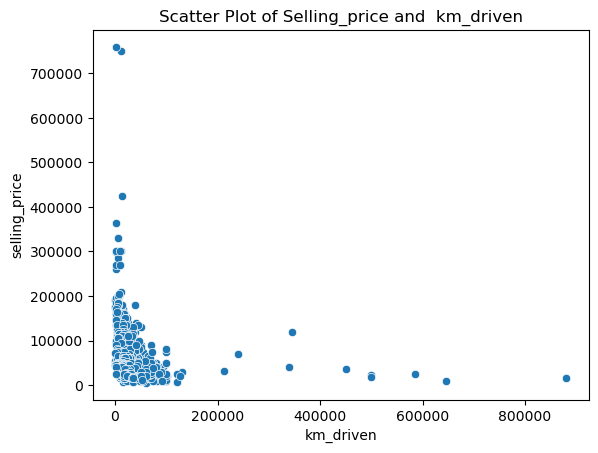

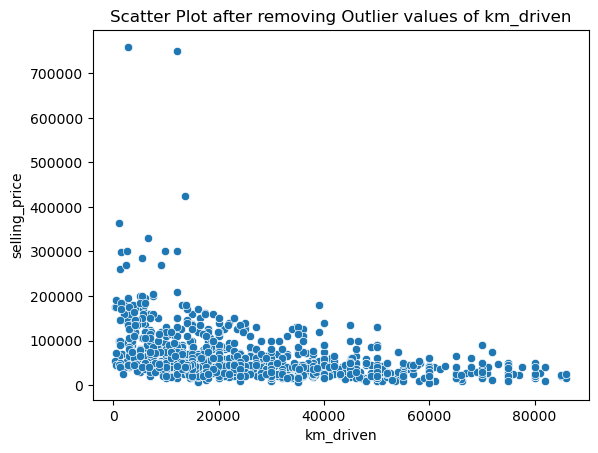

In [5]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = bike_details['km_driven'].quantile(0.25)
Q3 = bike_details['km_driven'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_cleaned = bike_details[(bike_details['km_driven'] >= lower_bound) & (bike_details['km_driven'] <= upper_bound)]
print(f" shape of the original data frame is:   {bike_details . shape}")
print(f" shape of data frame after removal of outlayers from 'km_driven value':   {df_cleaned . shape}")
plt.title("Scatter Plot of Selling_price and  km_driven")
sns.scatterplot(data = bike_details  , x = 'km_driven', y = 'selling_price')
plt.show()
plt.title("Scatter Plot after removing Outlier values of km_driven")
sns.scatterplot(data = df_cleaned  , x = 'km_driven', y = 'selling_price')
plt.show()



EDA1 Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price


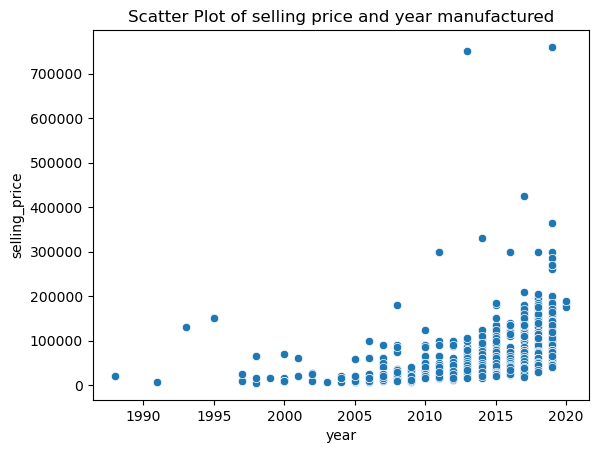

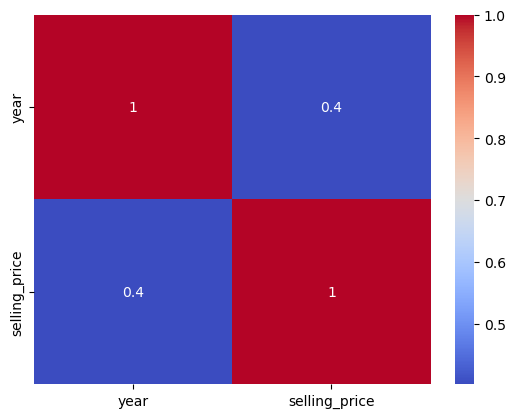

In [6]:
sns.scatterplot(x='year', y='selling_price', data= bike_details)
plt.title("Scatter Plot of selling price and year manufactured")
plt.show()

# Correlation Heatmap
corr_matrix = bike_details[["year", "selling_price"]] .corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

from the above analysis when ' year' value increases, selling price value also increases

EDA1 Q13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

In [4]:
df = bike_details
df["age"] = df["year"].apply(lambda x: 2025 - x )
df1 = pd.concat((df["name"],df["ex_showroom_price"],df ["selling_price"],df ["age"]), axis = 1)
df2 = df1.dropna().reset_index()
df2["Depreciation"] = (df2["ex_showroom_price"] - df2["selling_price"])
df2["DepreciationPerYear"] = df2["Depreciation"] / df ["age"]
print(f" Average depreciation per year in selling price is : {(df2["DepreciationPerYear"].mean()) :.2f}")


 Average depreciation per year in selling price is : 2858.35


EDA1 Q14 Which bike names are priced significantly above the average price for their manufacturing year

In [103]:
df = bike_details
df1 = df.drop(axis=1, columns = ["year","seller_type","owner","km_driven","age","Depreciation"])
grouped_df1 = df1.groupby(["name"]).mean() # group by name of the bike and mean ex_showroom_price and mean selling_price
df2=grouped_df.drop( axis=1, columns = ["index","age","Depreciation","DepreciationPerYear"])
df2 = df2.reset_index()
df3 = df2.loc[df2["ex_showroom_price"] < df2["selling_price"]] #locatiing bike names which has above the average price for their manufacturing year 
print(f"bike names are priced significantly above the average price for their manufacturing year\n { df3}")

bike names are priced significantly above the average price for their manufacturing year
                                     name  ex_showroom_price  selling_price
66                Hero Splendor Plus i3s       55600.000000        67500.0
70                      Hero Xpulse 200T       96500.000000       105000.0
122  Royal Enfield Classic Gunmetal Grey      149203.428571       155000.0
123        Royal Enfield Classic Signals      164095.000000       195000.0
135                      Suzuki GSX S750      752020.000000       760000.0
171                         Yamaha Ray Z       52949.000000        55000.0
179                    Yamaha YZF R15 V3      146400.000000       170000.0
181                        Yamaha YZF R3      351680.000000       365000.0


EDA1 Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

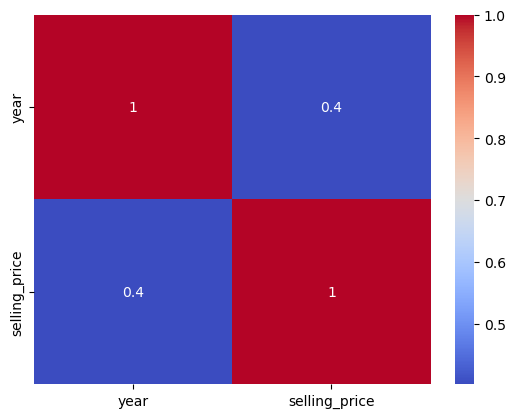

In [326]:
# Correlation Heatmap
corr_matrix = bike_details[["year", "selling_price"]] .corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

                                                  EDA - 2 

About - Dataset:
Title: Car Sale Dataset
Here is the dataset link: Car Sales
The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and consumer behavior. 

Source:
The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.

Description:
The dataset contains details about used cars listed for sale, such as
brand, model, selling price, kilometers driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,and understanding customer preferences.

Features:
Car_id: A unique identifier for each car in the dataset, helping to track individual car entries
Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD
Customer Name: The name of the customer who purchased the car, represented as a string
Gender: The gender of the customer, categorized as "Male" or "Female.
Annual Income: The customer's annual income in US dollars, represented as a numeric value
Dealer_Name: The name of the dealership selling the car, represented as a string
Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc
Model: The specific model name of the car, such as "Corolla," "Civic," etc
Engine: The engine type of the car, such as "V6," "I4," etc
Transmission: The type of transmission in the car, either "Manual" or "Automatic.
Color: The color of the car, represented as a string (e.g., "Red," "Blue")
Price ($): The selling price of the car in US dollars
Dealer_No: A unique identifier for each car dealer in the dataset
Body Style: The body style of the car, such as "Sedan," "SUV," etc
Phone: The phone number of the customer who purchased the car
Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [40]:
car_sales = pd.read_csv("Car Sale.csv")
df = car_sales .copy()
features = ["Car_id", "Date" ,"Customer Name","Gender", "Annual Income", "Dealer_Name", "Company", "Model" ,"Engine","Transmission","Color", "Price ($)", " Dealer_No ","Body Style","Phone","Dealer_Region"]  

In [41]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [6]:
df.head()

Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2          Overhead Camshaft       Manual         Red      31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style    Phone Dealer_Region  
0        SUV  8264678    Middletown  
1        SUV  6848189        Aurora  
2  Passenger  7298798    Greenville  
3        SUV  6257557         Pasco  
4  Hatchback  7081483    Janesville

In [7]:
df.tail()

Car_id        Date Customer Name  Gender  Annual Income  \
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                          Dealer_Name    Company    Model  \
23901                C & M Motors Inc   Plymouth  Voyager   
23902  Ryder Truck Rental and Leasing  Chevrolet    Prizm   
23903          Chrysler of Tri-Cities        BMW     328i   
23904               Chrysler Plymouth  Chevrolet    Metro   
23905                 Pars Auto Sales      Lexus    ES300   

                          Engine Transmission       Color  Price ($)  \
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown

In [9]:
df.sample(3)

Car_id       Date Customer Name  Gender  Annual Income  \
19180  C_CND_019181  10/2/2023     Alexandre  Female         450000   
2896   C_CND_002897   6/1/2022         Danny    Male        1410000   
18316  C_CND_018317  9/14/2023           Kai  Female        1000000   

                      Dealer_Name     Company     Model  \
19180          Tri-State Mack Inc   Chevrolet  Corvette   
2896         Star Enterprises Inc       Dodge  Intrepid   
18316  Gartner Buick Hyundai Saab  Mercedes-B       SLK   

                          Engine Transmission       Color  Price ($)  \
19180  DoubleÂ Overhead Camshaft         Auto         Red      45000   
2896           Overhead Camshaft       Manual       Black      11001   
18316  DoubleÂ Overhead Camshaft         Auto  Pale White      36000   

       Dealer_No  Body Style    Phone Dealer_Region  
19180  85257-3102        SUV  6222461    Scottsdale  
2896   99301-3882      Sedan  8203943         Pasco  
18316  38701-8047  Passenger  8837338    Greenville

In [13]:
df.shape

(23906, 17)

In [23]:
df.describe(include='all')

Car_id                           Date Customer Name Gender  \
count          23906                          23906         23905  23906   
unique         23906                            NaN          3021      2   
top     C_CND_000001                            NaN        Thomas   Male   
freq               1                            NaN            92  18798   
mean             NaN  2023-03-01 14:28:10.822387456           NaN    NaN   
min              NaN            2022-01-02 00:00:00           NaN    NaN   
25%              NaN            2022-09-20 00:00:00           NaN    NaN   
50%              NaN            2023-03-13 00:00:00           NaN    NaN   
75%              NaN            2023-09-08 00:00:00           NaN    NaN   
max              NaN            2023-12-31 00:00:00           NaN    NaN   
std              NaN                            NaN           NaN    NaN   

        Annual Income                                      Dealer_Name  \
count    2.390600e+04                                            23906   
unique            NaN                                               28   
top               NaN  Progressive Shippers Cooperative Association No   
freq              NaN                                             1318   
mean     8.308403e+05                                              NaN   
min      1.008000e+04                                              NaN   
25%      3.860000e+05                                              NaN   
50%      7.350000e+05                                              NaN   
75%      1.175750e+06                                              NaN   
max      1.120000e+07                                              NaN   
std      7.200064e+05                                              NaN   

          Company     Model                     Engine Transmission  \
count       23906     23906                      23906        23906   
unique         30       154                          2            2   
top     Chevrolet  Diamante  DoubleÂ Overhead Camshaft         Auto   
freq         1819       418                      12571        12571   
mean          NaN       NaN                        NaN          NaN   
min           NaN       NaN                        NaN          NaN   
25%           NaN       NaN                        NaN          NaN   
50%           NaN       NaN                        NaN          NaN   
75%           NaN       NaN                        NaN          NaN   
max           NaN       NaN                        NaN          NaN   
std           NaN       NaN                        NaN          NaN   

             Color     Price ($)  Dealer_No  Body Style         Phone  \
count        23906  23906.000000       23906      23906  2.390600e+04   
unique           3           NaN           7          5           NaN   
top     Pale White           NaN  85257-3102        SUV           NaN   
freq         11256           NaN        3814       6374           NaN   
mean           NaN  28090.247846         NaN        NaN  7.497741e+06   
min            NaN   1200.000000         NaN        NaN  6.000101e+06   
25%            NaN  18001.000000         NaN        NaN  6.746495e+06   
50%            NaN  23000.000000         NaN        NaN  7.496198e+06   
75%            NaN  34000.000000         NaN        NaN  8.248146e+06   
max            NaN  85800.000000         NaN        NaN  8.999579e+06   
std            NaN  14788.687608         NaN        NaN  8.674920e+05   

       Dealer_Region                           date  
count          23906                          23906  
unique             7                            NaN  
top           Austin                            NaN  
freq            4135                            NaN  
mean             NaN  2023-03-01 14:28:10.822387456  
min              NaN            2022-01-02 00:00:00  
25%              NaN            2022-09-20 00:00:00  
50%              NaN            2023-03-13 00:00:0

In [19]:
df.duplicated().sum()

0

In [4]:
#converting Date in to datetime catogory
df["Date"] = pd.to_datetime(df["Date"])

EDA2 Q1 What is the average selling price of cars for each dealer, and how does it compare across different dealers

In [57]:
# Group by dealer and calculate the average selling price
dealer_avg_prices = df.groupby("Dealer_Name")["Price ($)"].mean().reset_index()

# Rename columns for clarity
dealer_avg_prices.columns = ["Dealer", "Average_Selling_Price"]

# Sort dealers by average price
dealer_avg_prices = dealer_avg_prices.sort_values(by="Average_Selling_Price", ascending=False).reset_index()
dealer_avg_prices

index                                           Dealer  \
0      27                                        U-Haul CO   
1       5                                    Classic Chevy   
2      19                             Rabun Used Car Sales   
3      11                                  Iceberg Rentals   
4       8                            Enterprise Rent A Car   
5      23                Scrivener Performance Engineering   
6       9                       Gartner Buick Hyundai Saab   
7      22                                 Saab-Belle Dodge   
8       2                                      Capitol KIA   
9      20                                    Race Car Help   
10      4                           Chrysler of Tri-Cities   
11     24                             Star Enterprises Inc   
12     25                                    Suburban Ford   
13      1                                 C & M Motors Inc   
14     26                               Tri-State Mack Inc   
15     16                                  Pars Auto Sales   
16      7                               Diehl Motor CO Inc   
17     13                      Motor Vehicle Branch Office   
18     21                   Ryder Truck Rental and Leasing   
19     18  Progressive Shippers Cooperative Association No   
20     15                  New Castle Ford Lincoln Mercury   
21     10                              Hatfield Volkswagen   
22     14                                   Nebo Chevrolet   
23      6                          Clay Johnson Auto Sales   
24     12                     McKinney Dodge Chrysler Jeep   
25      3                                Chrysler Plymouth   
26     17            Pitre Buick-Pontiac-Gmc of Scottsdale   
27      0              Buddy Storbeck's Diesel Service Inc   

    Average_Selling_Price  
0            28769.919006  
1            28602.014446  
2            28527.536177  
3            28522.958533  
4            28312.580800  
5            28297.371589  
6            28247.621019  
7            28190.139888  
8            28189.703822  
9            28163.372706  
10           28123.091054  
11           28113.055244  
12           28112.206758  
13           28111.755200  
14           28095.562050  
15           28013.060317  
16           27993.929487  
17           27956.739617  
18           27914.988782  
19           27884.264036  
20           27867.131955  
21           27853.712242  
22           27818.889415  
23           27816.027113  
24           27684.096979  
25           27555.526400  
26           27404.248408  
27           27217.261563

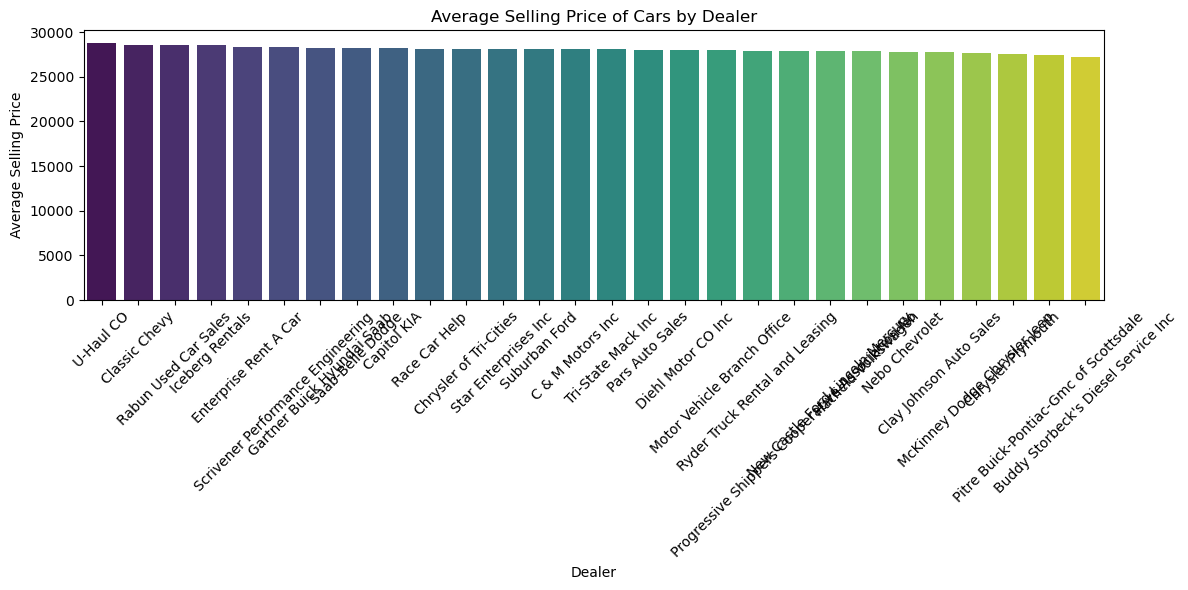

In [58]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=dealer_avg_prices, x="Dealer", y="Average_Selling_Price", palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Selling Price of Cars by Dealer")
plt.ylabel("Average Selling Price")
plt.xlabel("Dealer")
plt.tight_layout()
plt.show()

EDA2 Q2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

In [21]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23906 non-null  object        
 4   Annual Income  23906 non-null  int64         
 5   Dealer_Name    23906 non-null  object        
 6   Company        23906 non-null  object        
 7   Model          23906 non-null  object        
 8   Engine         23906 non-null  object        
 9   Transmission   23906 non-null  object        
 10  Color          23906 non-null  object        
 11  Price ($)      23906 non-null  int64         
 12  Dealer_No      23906 non-null  object        
 13  Body Style     23906 non-null  object        
 14  Phone          23906 non-null  int64         
 15

In [ ]:
# Handle missing or erroneous data
#df = df.dropna(subset=['Company', 'Price ($)'])  # Drop rows with missing values in relevant columns
#df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')  # Ensure Price is numeric
#df = df.dropna(subset=['Price ($)'])  # Drop rows where Price could not be converted to numeric

In [22]:
# Group data by company and calculate the price variation (standard deviation)
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

In [23]:
# Identify the company with the highest price variation
highest_price_variation_company = price_variation.idxmax()
highest_price_variation_value = price_variation.max()

print(f"\nCompany with the highest price variation: {highest_price_variation_company}")
print(f"Highest price variation: {highest_price_variation_value}")


Company with the highest price variation: Lincoln
Highest price variation: 19658.050211265567


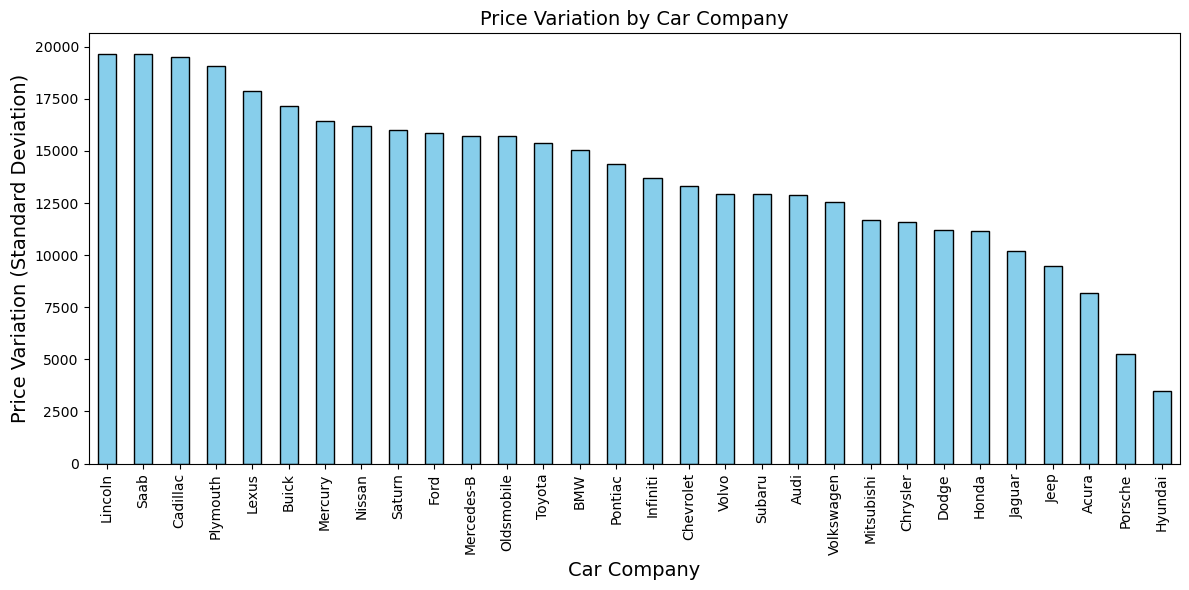


Insights:
The company with the highest price variation is Lincoln, indicating a wide range of prices.
This could suggest that the company offers cars of  economy, mid-range, and luxury.


In [24]:
# Plot the price variation
plt.figure(figsize=(12, 6))
price_variation.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Price Variation by Car Company', fontsize=14)
plt.xlabel('Car Company', fontsize=14)
plt.ylabel('Price Variation (Standard Deviation)', fontsize=14)
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Insights
print("\nInsights:")
print(f"The company with the highest price variation is {highest_variation_company}, indicating a wide range of prices.")
print("This could suggest that the company offers cars of  economy, mid-range, and luxury.")

EDA2 Q3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

In [69]:
df1 = df[['Price ($)', 'Transmission']]
# Calculate summary statistics
summary_stats = df1.groupby('Transmission')['Price ($)'].describe()
print(summary_stats)

                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  


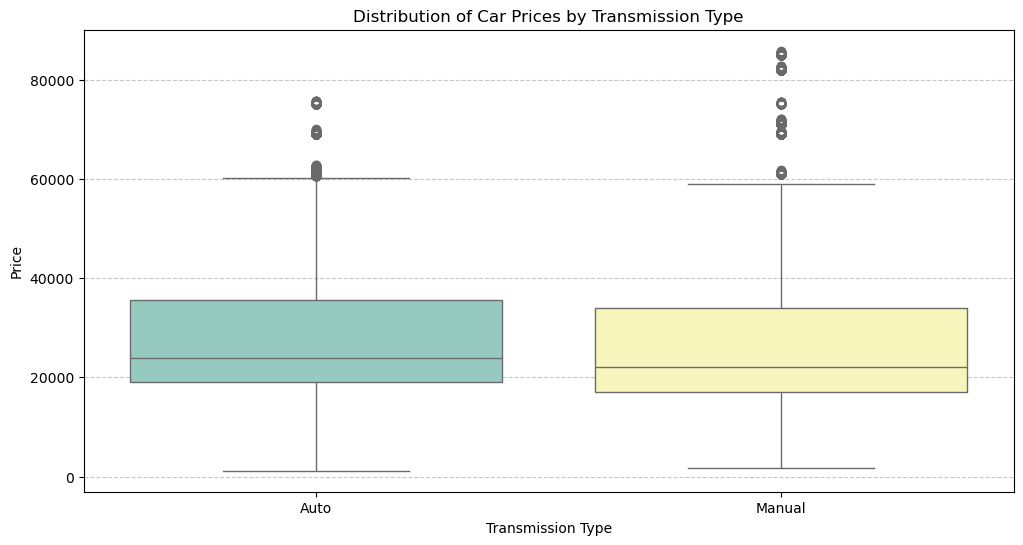

In [70]:
# Visualize with boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Transmission', y='Price ($)', palette='Set3')
plt.title('Distribution of Car Prices by Transmission Type')
plt.ylabel('Price')
plt.xlabel('Transmission Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

EDA2 Q4 What is the distribution of car prices across different regions

In [ ]:
df2 = df.dropna(subset=[ 'Dealer_Region', 'Price ($)'])  # Drop rows with missing price or region

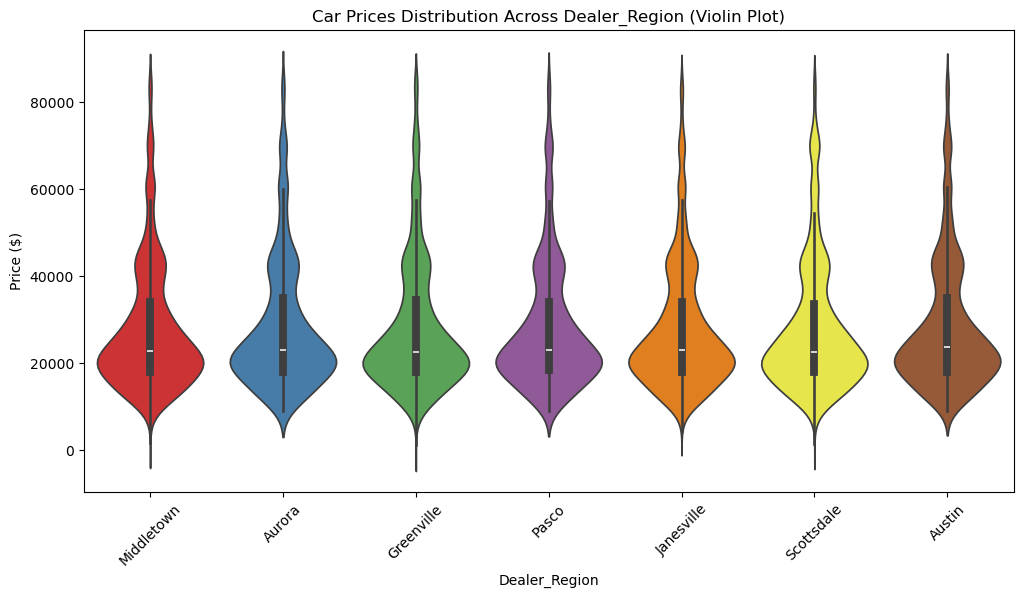

In [74]:
# Violin plot for a deeper look at the distribution
plt.figure(figsize=(12, 6))
sns.violinplot(data = df2, x='Dealer_Region', y='Price ($)', palette='Set1')
plt.xticks(rotation=45)
plt.title('Car Prices Distribution Across Dealer_Region (Violin Plot)')
plt.show()

EDA2 Q5 What is the distribution of cars based on body styles

In [76]:
df3 = df.dropna(subset=[ 'Body Style', 'Price ($)'])  # Drop rows with missing price or region

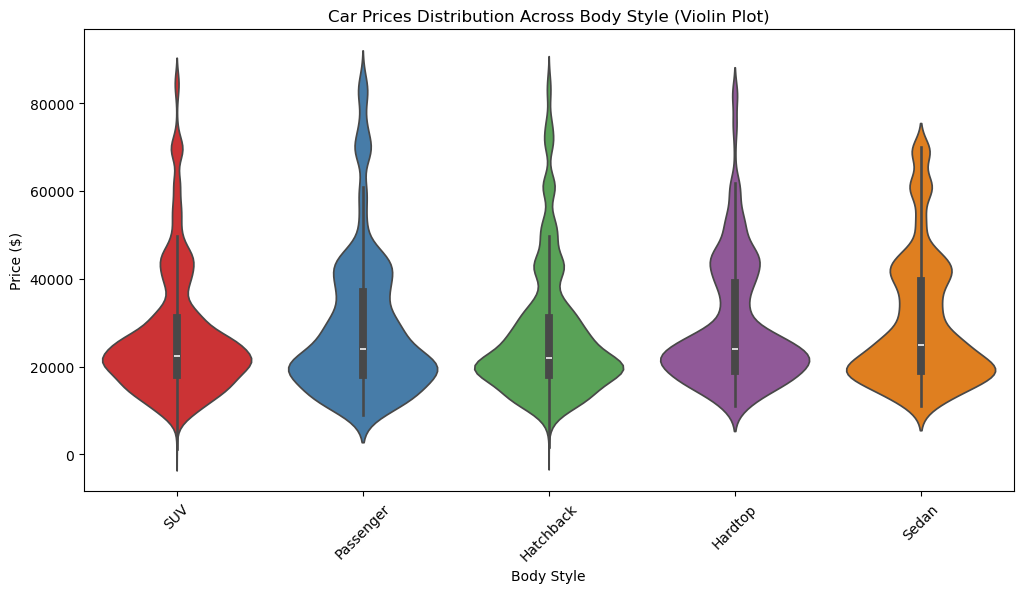

In [80]:
# Violin plot for a deeper look at the distribution
plt.figure(figsize=(12, 6))
sns.violinplot(data = df3, x='Body Style', y='Price ($)', palette='Set1')
plt.xticks(rotation=45)
plt.title('Car Prices Distribution Across Body Style (Violin Plot)')
plt.show()

EDA2 How does the average selling price of cars vary by customer gender and annual income

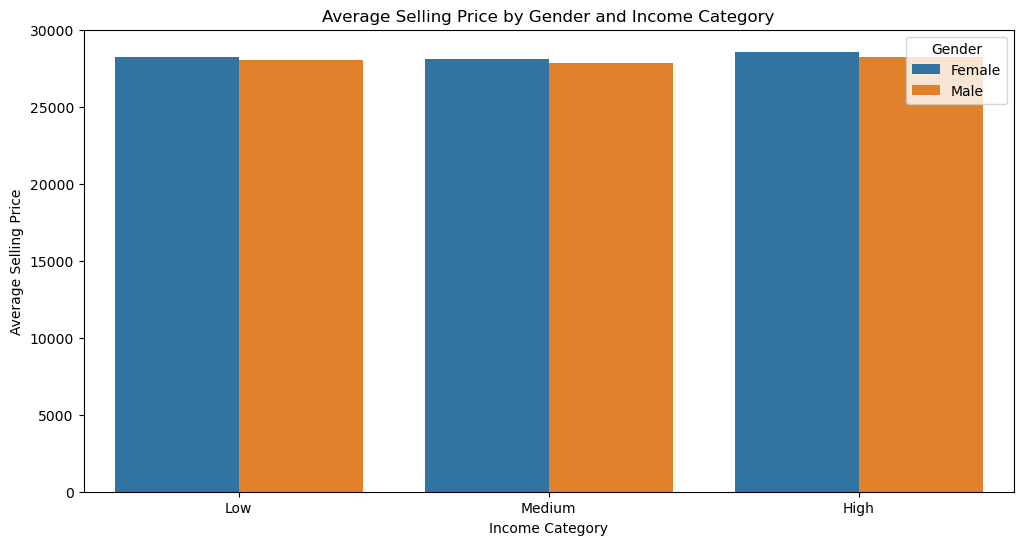

In [84]:
df.dropna(subset=['Gender', 'Annual Income', 'Price ($)'], inplace=True)

# Bin annual income
df['Income_Category'] = pd.qcut(df['Annual Income'], q=3, labels=['Low', 'Medium', 'High'])

# Group by gender and income
grouped = df.groupby(['Gender', 'Income_Category'])['Price ($)'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Income_Category', y='Price ($)', hue='Gender')
plt.title('Average Selling Price by Gender and Income Category')
plt.ylabel('Average Selling Price')
plt.xlabel('Income Category')
plt.legend(title='Gender')
plt.show()

EDA2 Q7 What is the distribution of car prices by region, and how does the number of cars sold vary by region

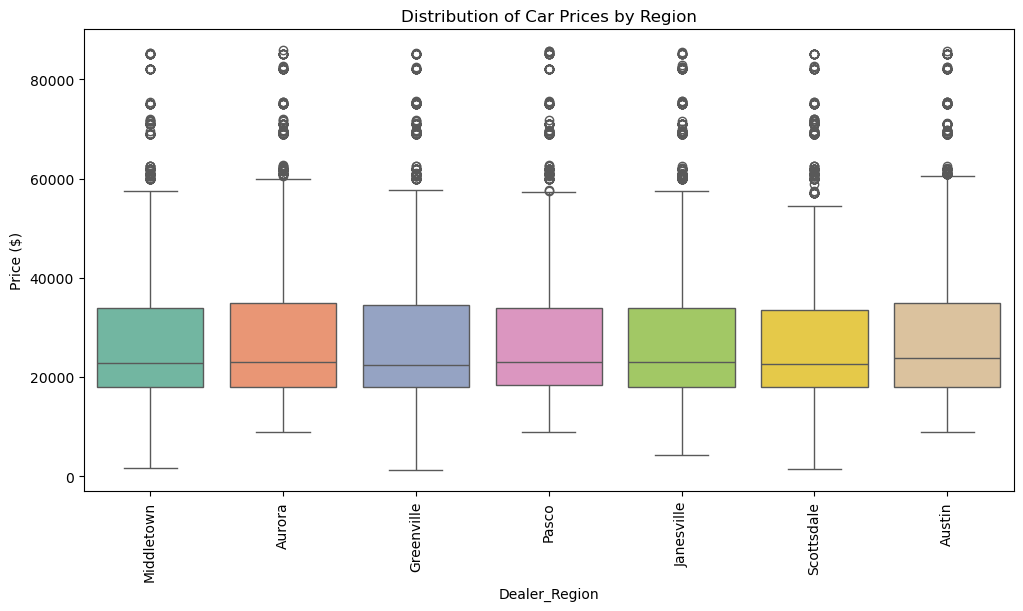

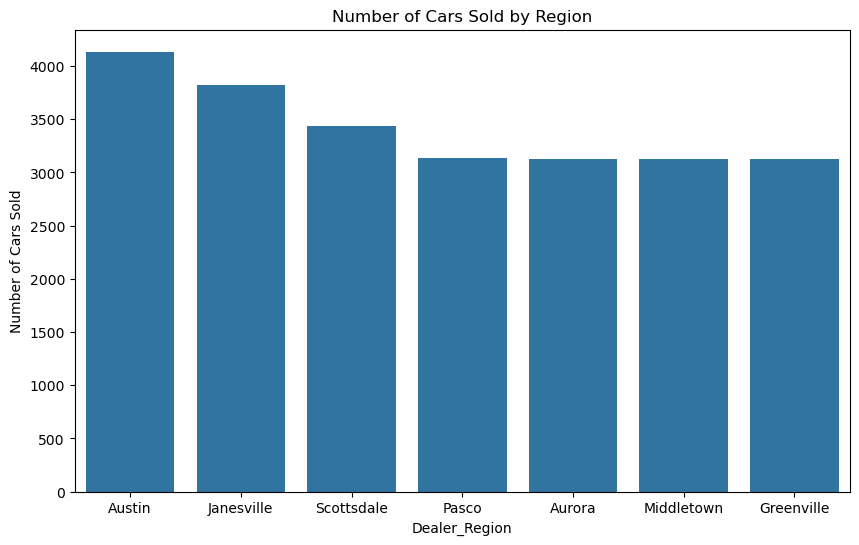

In [13]:
# Clean and aggregate data
df = df.dropna(subset=['Price ($)', 'Dealer_Region'])
region_price_summary = df.groupby('Dealer_Region')['Price ($)'].describe()
region_sales_count = df['Dealer_Region'].value_counts()

# Plot distribution of car prices by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)',palette = 'Set2')
plt.title('Distribution of Car Prices by Region')
plt.xticks(rotation=90)
plt.show()

# Plot number of cars sold by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales_count.index, y=region_sales_count.values)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer_Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=90)
plt.show()

EDA2 Q8 How does the average car price differ between cars with different engine sizes

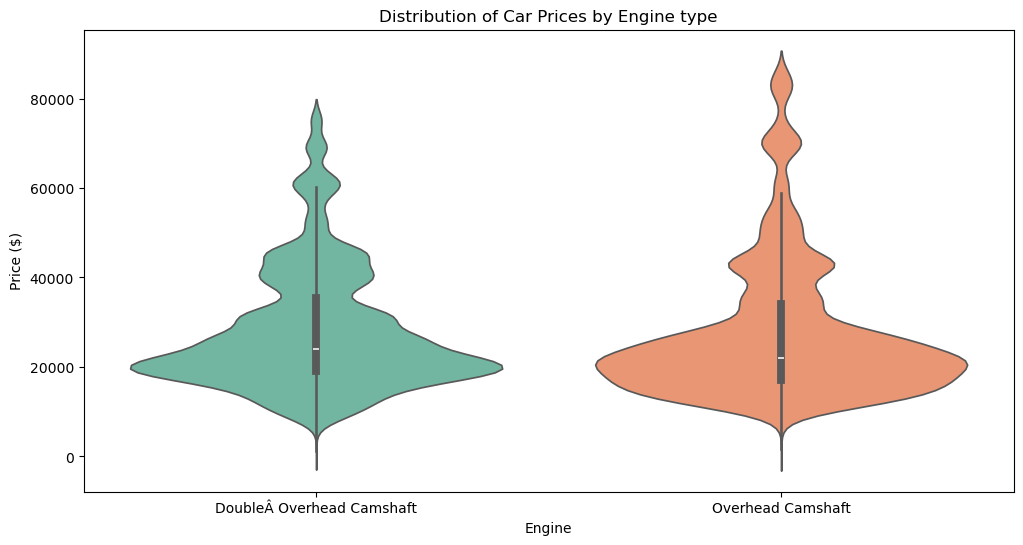

In [17]:
df = df.dropna(subset=['Price ($)', 'Engine'])
price_Engine_summary = df.groupby('Engine')['Price ($)'].mean()
#region_sales_count = df['Dealer_Region'].value_counts()

# Plot distribution of car prices by region
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Engine', y='Price ($)',palette = 'Set2')
plt.title('Distribution of Car Prices by Engine type')
#plt.xticks(rotation=45)
plt.show()

In [ ]:
EDA2 Q9 How do car prices vary based on the customer’s annual income bracket

<Axes: xlabel='Annual Income', ylabel='Price ($)'>

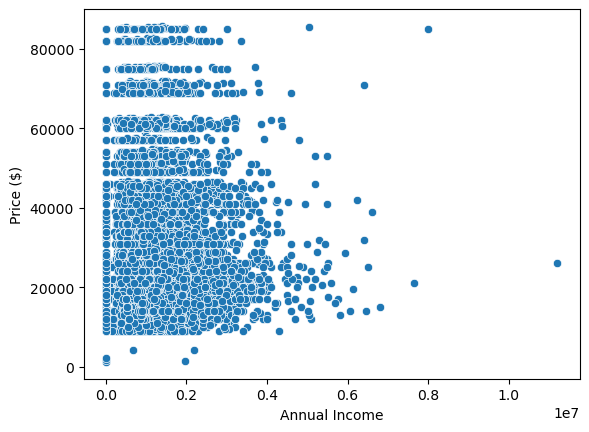

In [11]:
df['Income_Category'] = pd.qcut(df['Annual Income'], q=3, labels=['Low', 'Medium', 'High'])
sns.scatterplot(data= df, x='Annual Income', y='Price ($)')

inaight : no Significant relationship between annual income of the cosomer and price of the car

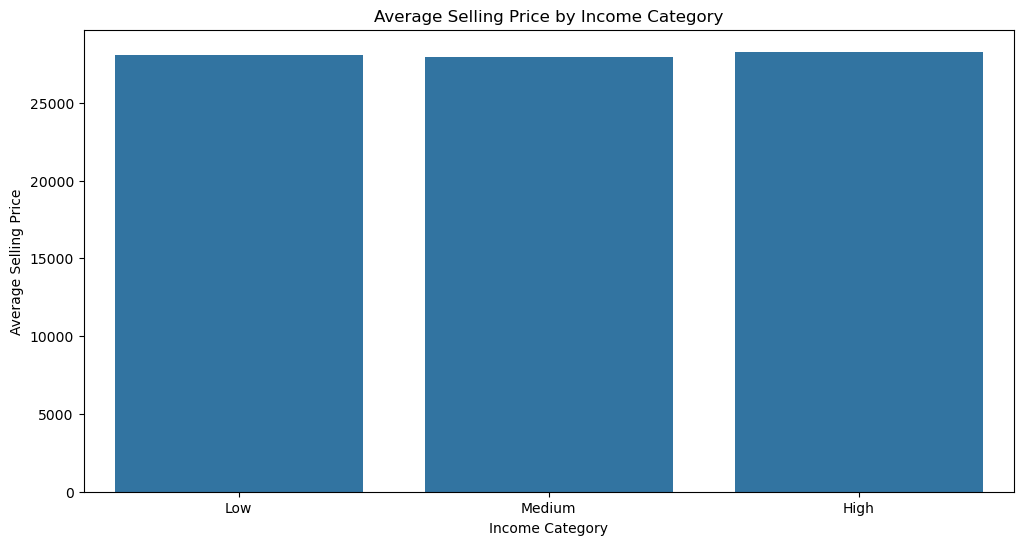

In [ ]:
# Group by gender and income
grouped = df.groupby(['Income_Category'])['Price ($)'].mean().reset_index()
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Income_Category', y='Price ($)')
plt.title('Average Selling Price by Income Category')
plt.ylabel('Average Selling Price')
plt.xlabel('Income Category')
plt.show()

In [ ]:
EDA2 Q10 What are the top 5 car models with the highest number of sales, and how does their price distribution look



Top 5 car models with highest number of sales:
    top_models  count
0    Diamante    418
1  Silhouette    411
2       Prizm    411
3      Passat    391
4       Jetta    382




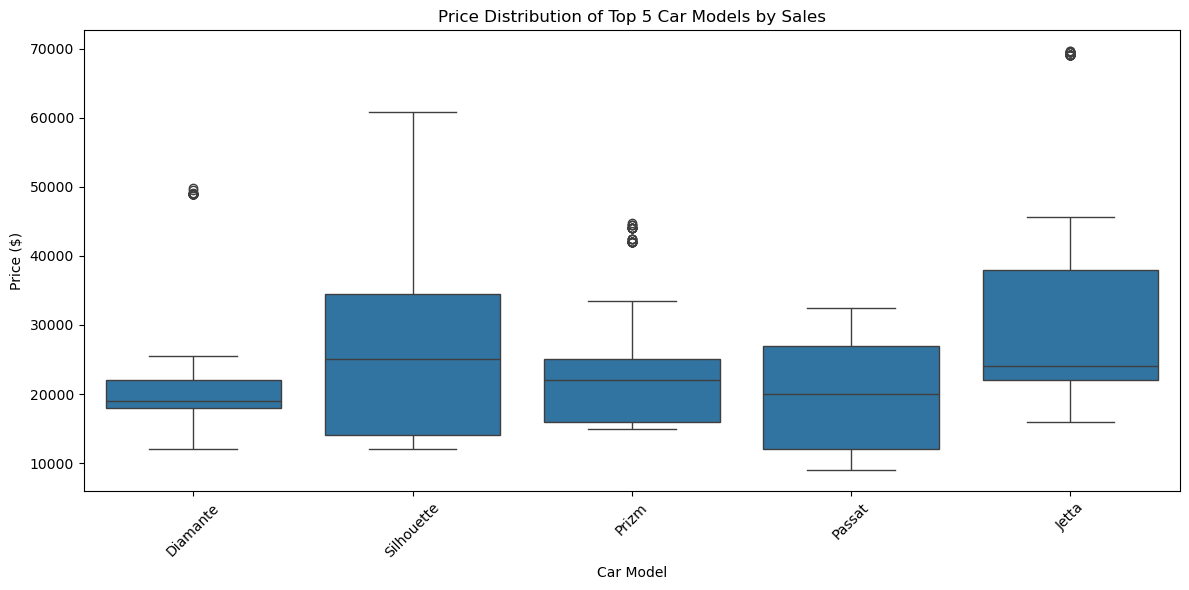

In [7]:
df = car_sales .copy()
df.dtypes
df= df.dropna().reset_index(drop=True)

# Get the top 5 car models with the highest number of sales
top_model = df['Model'].value_counts()[:5]
top_model_sales = top_model .reset_index()
top_model_sales . columns = ["top_models","count"]
print(f"\n\nTop 5 car models with highest number of sales:\n {top_model_sales}\n\n")

# Filter the data for only the top 5 models
top_5_model_sales_data = df[df['Model'].isin(top_model_sales["top_models"])]

# Plot the price distribution for the top 5 models
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_5_model_sales_data, x='Model', y='Price ($)', order=top_model_sales["top_models"])
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()

EDA2 Q11 How does car price vary with engine size across different car colors, and which colors have the highest price variation


Price variation by color:
Color
Red           28736.319007
Black         28564.798015
Pale White    27482.334074
Name: Price ($), dtype: float64

Colors with the highest price variation: ['Red', 'Black', 'Pale White']


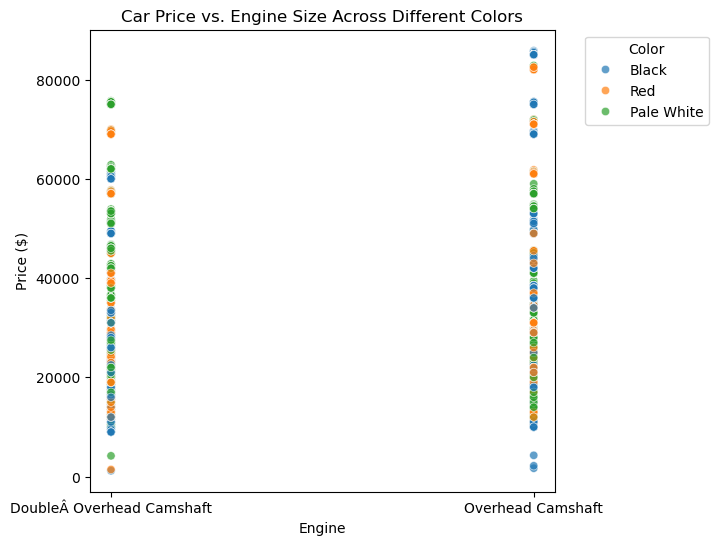

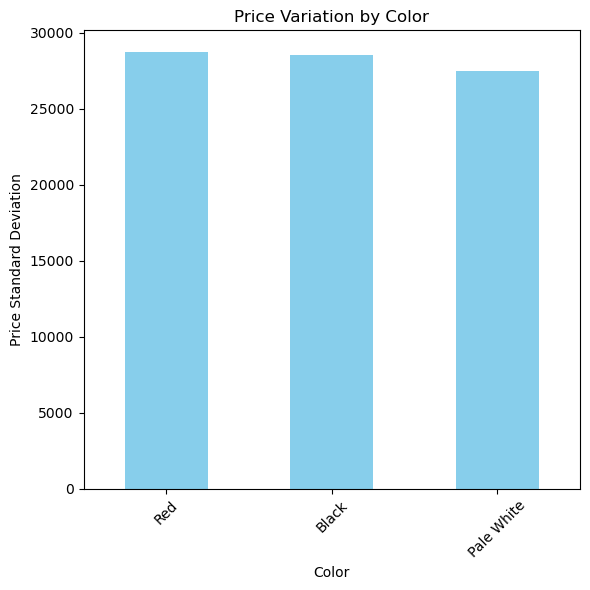

In [14]:
# Check for missing values
df = df.dropna(subset=["Color","Engine","Price ($)"])

# Price variation by color
price_variation = df.groupby("Color")["Price ($)"].mean().sort_values(ascending=False)
print("\nPrice variation by color:")
print(price_variation)

# Colors with the highest price variation
most_variable_colors = price_variation.head(5).index.tolist()
print("\nColors with the highest price variation:", most_variable_colors)

# Plot price vs. engine size for different colors
plt.figure(figsize=(6, 6))
sns.scatterplot(
    data=df, x="Engine", y="Price ($)", hue="Color", palette="tab10", alpha=0.7
)
plt.title("Car Price vs. Engine Size Across Different Colors")
plt.xlabel("Engine")
plt.ylabel("Price ($)")
plt.legend(title="Color", bbox_to_anchor=(1.05, 1), loc="upper left")
#plt.tight_layout()
plt.show()

# Plot price variation across colors
plt.figure(figsize=(6, 6))
price_variation.plot(kind="bar", color="skyblue")
plt.title("Price Variation by Color")
plt.xlabel("Color")
plt.ylabel("Price Standard Deviation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


EDA2  Q13 Is there any seasonal trend in car sales based on the date of sale

<Axes: title={'center': 'Monthly Car Sales Trend'}, xlabel='Month', ylabel='Number of Cars Sold'>

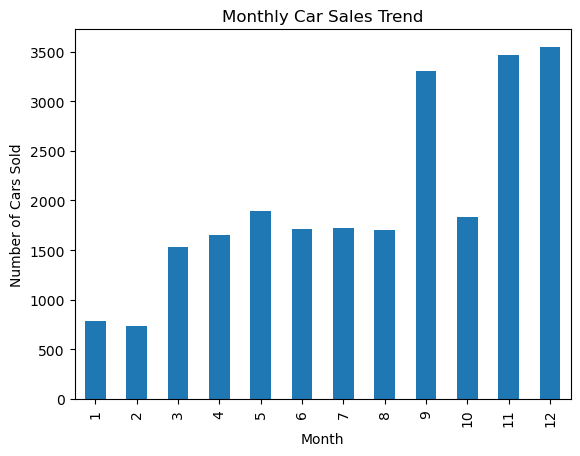

In [46]:
df['date'] = pd.to_datetime(df['Date'])
# Extract year, month, day, day of week, and season
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day  #day of the month

# Define seasons (Northern Hemisphere example)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

monthly_sales = df.groupby('month')['Car_id'].count()  # Replace 'car_id' with sales count column
monthly_sales.plot(kind='bar', title='Monthly Car Sales Trend', xlabel='Month', ylabel='Number of Cars Sold')

<Axes: title={'center': 'Seasonal Car Sales Trend'}, xlabel='Season', ylabel='Number of Cars Sold'>

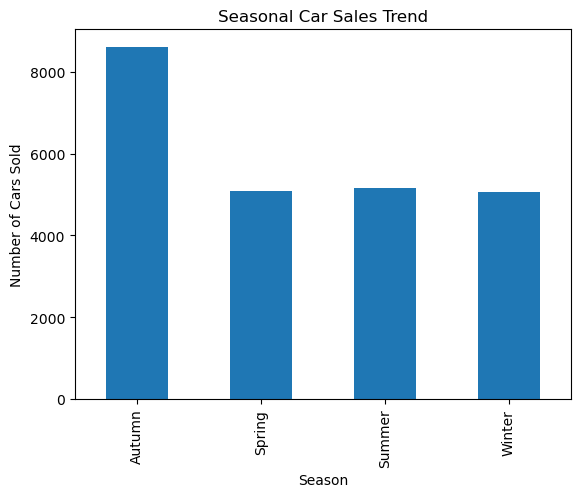

In [ ]:
seasonal_sales = df.groupby('season')['Car_id'].count()
seasonal_sales.plot(kind='bar', title='Seasonal Car Sales Trend', xlabel='Season', ylabel='Number of Cars Sold')

EDA2 Q13 How does the car price distribution change when considering different combinations of body style and transmission type

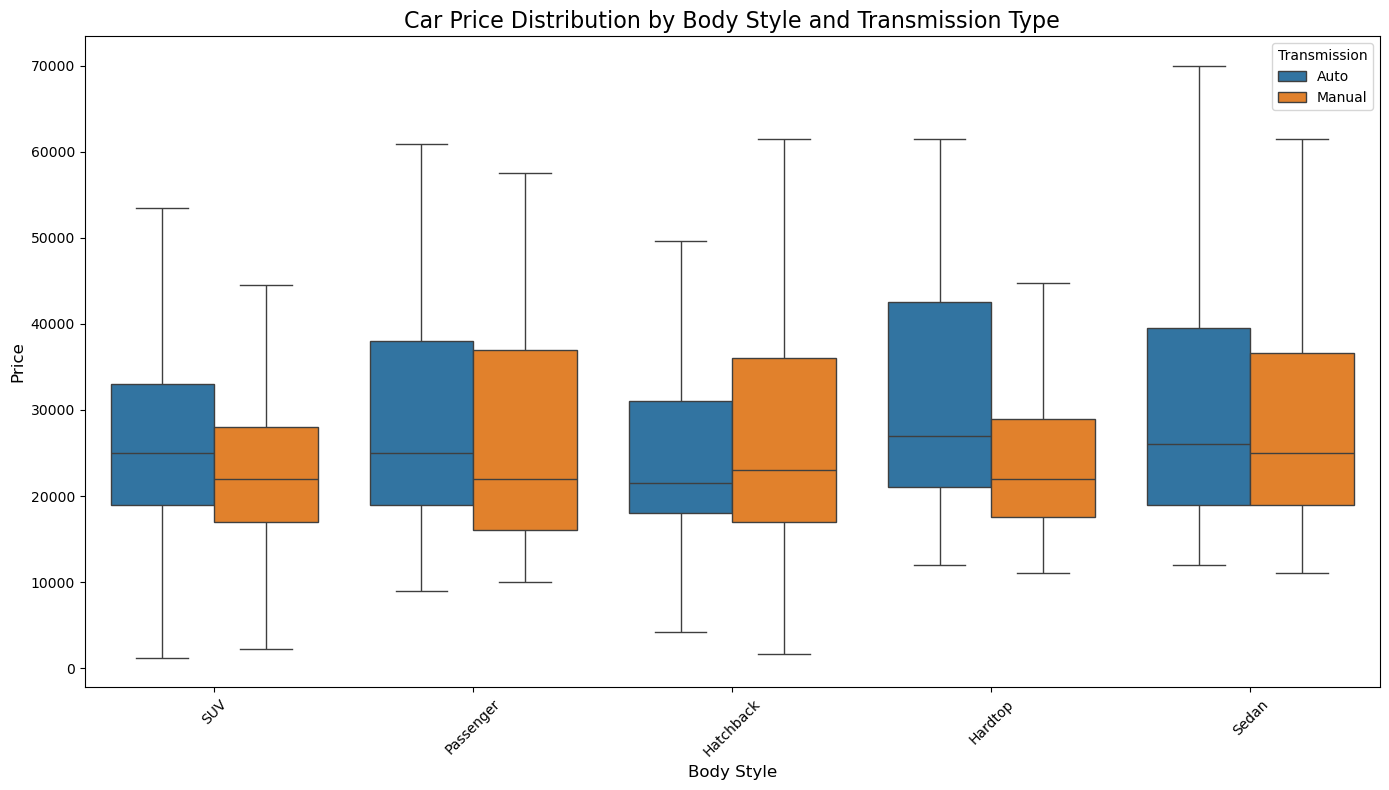

In [35]:
# Drop rows with missing values in relevant columns
df = df.dropna(subset=["Body Style","Transmission","Price ($)"])

# Plot the distribution of car prices for each combination of body style and transmission type
plt.figure(figsize=(14, 8))
sns.boxplot(data=df,x= 'Body Style',y='Price ($)',hue='Transmission', showfliers=False)  # Exclude outliers for better visualization
plt.title('Car Price Distribution by Body Style and Transmission Type', fontsize=16)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Transmission', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

EDA2 Q14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

Correlation Matrix:
                Price ($)  Engine_encoded  Annual Income
Price ($)        1.000000       -0.011271       0.012065
Engine_encoded  -0.011271        1.000000      -0.006598
Annual Income    0.012065       -0.006598       1.000000

 Encoding of Engine type is:
                       Engine  code  count
0  DoubleÂ Overhead Camshaft     0  12571
1          Overhead Camshaft     1  11335


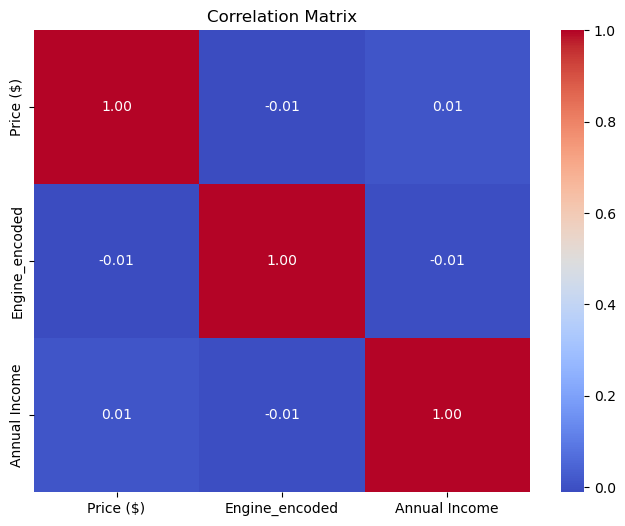

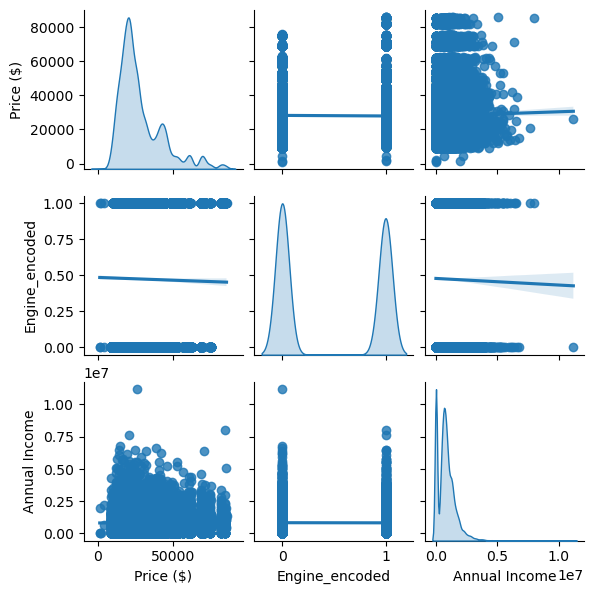

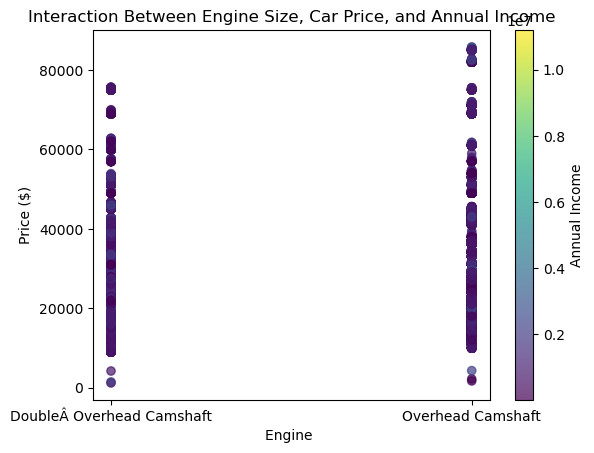

In [75]:
from sklearn.preprocessing import LabelEncoder
# Encoding of catogarical data 'Engine'
df = car_sales .copy()
df['Engine_encoded'] = LabelEncoder().fit_transform(df['Engine'])
# Check for missing values
df1 = df[['Price ($)', 'Engine_encoded', 'Annual Income']].dropna()
df2 = df[['Price ($)', 'Engine', 'Annual Income']].dropna()
df3= df.groupby(['Engine','Engine_encoded'])['Engine'].value_counts().reset_index()
df3.columns=['Engine','code','count']
# Compute correlation matrix
correlation_matrix = df1.corr()
print("Correlation Matrix:")
print(correlation_matrix)
print(f"\n Encoding of Engine type is:\n {df3}")
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
# Analyze individual feature relationships

# Pairplot to visualize interaction between the features
sns.pairplot(df1, kind='reg', diag_kind='kde', height=2)
plt.show()

#plt.figure(figsize=(12, 6))
# Scatter plot: Car Price vs. Engine Size, colored by Annual Income
scatter = plt.scatter(df2['Engine'], df2['Price ($)'], c=df2['Annual Income'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Annual Income')
plt.xlabel('Engine ')
plt.ylabel('Price ($)')
plt.title('Interaction Between Engine Size, Car Price, and Annual Income')
plt.show()

EDA2 Q15 How does the average car price vary across different car models and engine types?

In [138]:
df1 = df[['Model', 'Color','Price ($)']].dropna().reset_index()
# Plot price vs. engine size for different colors
price_variation = df1.groupby(['Model',"Color"])["Price ($)"].mean().sort_values(ascending=False).reset_index()
price_variation.columns=['Model',"Color","Avg_Price"]

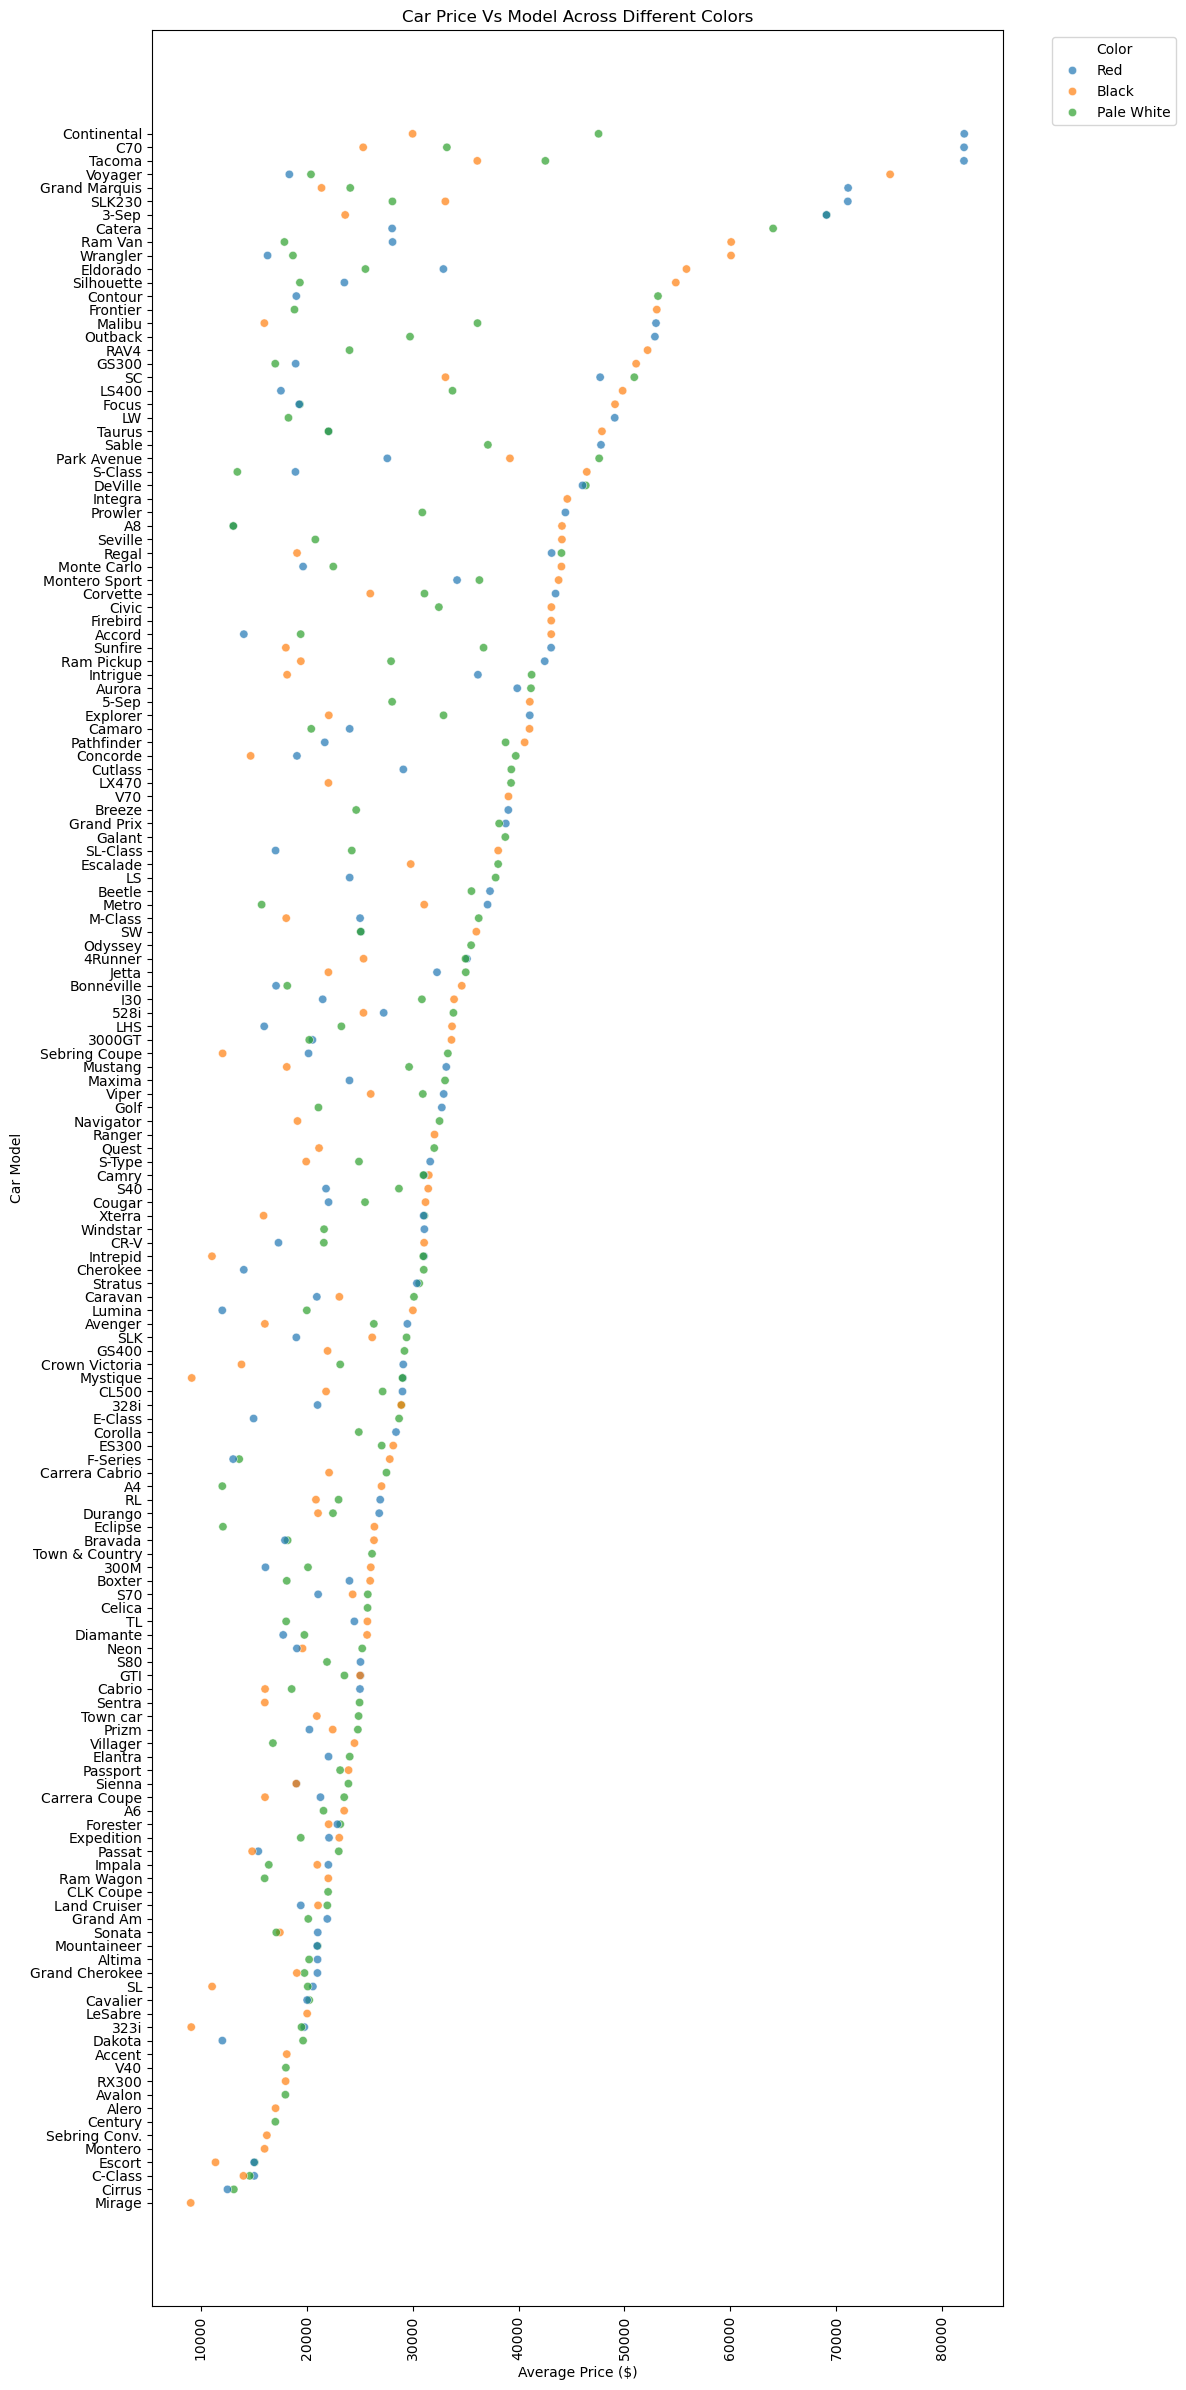

In [139]:
# Plot price vs. engine size for different colors
plt.figure(figsize=(12,24))
sns.scatterplot(data=price_variation, y="Model", x="Avg_Price", hue="Color", palette="tab10", alpha=0.7)
plt.title("Car Price Vs Model Across Different Colors")
plt.ylabel("Car Model")
plt.xlabel("Average Price ($)")
plt.legend(title="Color", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

                                                    EDA 3

In [ ]:
Amazon Sales Data
Description:
This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

In [ ]:
Features:
product_id: Unique identifier for each product
product_name: Name of the product
category: Category of the product
discounted_price: Discounted price of the product
actual_price: Actual price of the product
discount_percentage: Percentage of discount for the product
rating: Rating of the product (1-5)
rating_count: Number of people who voted for the Amazon rating
about_product: Description about the product
user_id: ID of the user who wrote the review
user_name: Name of the user who wrote the review
review_id: ID of the user review
review_title: Short review
review_content: Long review
img_link: Image link of the product
product_link: Official website link of the product


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
amazon = pd.read_csv('amazon.csv')
df = amazon.copy()

In [5]:
print(df.info())
print(df.isnull().sum())
print(f"\nDuplicated data\n{df.duplicated().sum()}")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
#data preparation

df['discounted_price'] = df['discounted_price'].str.replace('\u20B9','').str.replace(',','')#df['actual_price'] = df['actual_price'].str.replace('\u20B9','').str.replace(',','')

df['actual_price'] = df['actual_price'].str.replace('\u20B9','').str.replace(',','')

df['discount_percentage'] = df['discount_percentage'].str.replace('%','')

df['rating_count'] = df['rating_count'].str.replace(',','')

df['discounted_price'] =pd.to_numeric(df['discounted_price'],errors = 'coerce')

df['actual_price'] = pd.to_numeric(df['actual_price'],errors = 'coerce')

df['discount_percentage'] = pd.to_numeric(df['discount_percentage'],errors = 'coerce')

df['rating'] = pd.to_numeric(df['rating'],errors = 'coerce')

df['rating_count'] = pd.to_numeric(df['rating_count'],errors = 'coerce')

In [27]:
df.isnull().sum()
df.dropna(axis= 0,inplace=True)
df.isnull().sum()
df1=df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   int64  
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

In [ ]:
df1.

In [6]:
df1.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

EDA3 Q1 What is the average rating for each product category

In [115]:
category_wise_avg_rating = df1.groupby(df1['category'])['rating'].mean()
category_wise_avg_rating.sort_values(ascending=False).reset_index()

category  rating
0                        Computers&Accessories|Tablets     4.6
1    Computers&Accessories|NetworkingDevices|Networ...     4.5
2     Electronics|Cameras&Photography|Accessories|Film     4.5
3    Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
4    OfficeProducts|OfficeElectronics|Calculators|B...     4.5
..                                                 ...     ...
206  Computers&Accessories|Accessories&Peripherals|...     3.6
207  Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
208  Computers&Accessories|Accessories&Peripherals|...     3.5
209  Computers&Accessories|Accessories&Peripherals|...     3.4
210  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]

EDA3 Q2 What are the top rating_count products by category

In [146]:
category_wise_product_rating_count = df1[['category','product_id', 'product_name','rating_count']].sort_values(by=['rating_count'],ascending=False)
category_wise_product_rating_count.reset_index()

index                                           category  product_id  \
0        12  Electronics|HomeTheater,TV&Video|Accessories|C...  B07KSMBL2H   
1        65  Electronics|HomeTheater,TV&Video|Accessories|C...  B014I8SX4Y   
2        47  Electronics|HomeTheater,TV&Video|Accessories|C...  B014I8SSD0   
3       684  Electronics|HomeTheater,TV&Video|Accessories|C...  B07KSMBL2H   
4       400  Electronics|Headphones,Earbuds&Accessories|Hea...  B07GQD4K6L   
...     ...                                                ...         ...   
1457   1344  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...  B0BNLFQDG2   
1458   1070  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...  B0BGPN4GGH   
1459   1385  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...  B0BL3R4RGS   
1460   1309  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...  B0BPJBTB3F   
1461   1459  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...  B0B3JSWG81   

                                           product_name  rating_count  
0     AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0  
1     Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0  
2     Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0  
3     AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0  
4     boAt Bassheads 100 in Ear Wired Earphones with...      363713.0  
...                                                 ...           ...  
1457  Longway Blaze 2 Rod Quartz Room Heater (White,...           4.0  
1458  Lifelong LLQH925 Dyno Quartz Heater 2 Power se...           4.0  
1459  VAPJA® Portable Mini Juicer Cup Blender USB Re...           4.0  
1460  Khaitan ORFin Fan heater for Home and kitchen-...           2.0  
1461  NGI Store 2 Pieces Pet Hair Removers for Your ...           2.0  

[1462 rows x 5 columns]

EDA3 Q3 What is the distribution of discounted prices vs. actual prices

In [150]:
dis_vs_act_price = df1[['discounted_price','actual_price']]
dis_vs_act_price .describe()

discounted_price   actual_price
count       1462.000000    1462.000000
mean        3129.981826    5453.087743
std         6950.548042   10884.467444
min           39.000000      39.000000
25%          325.000000     800.000000
50%          799.000000    1670.000000
75%         1999.000000    4321.250000
max        77990.000000  139900.000000

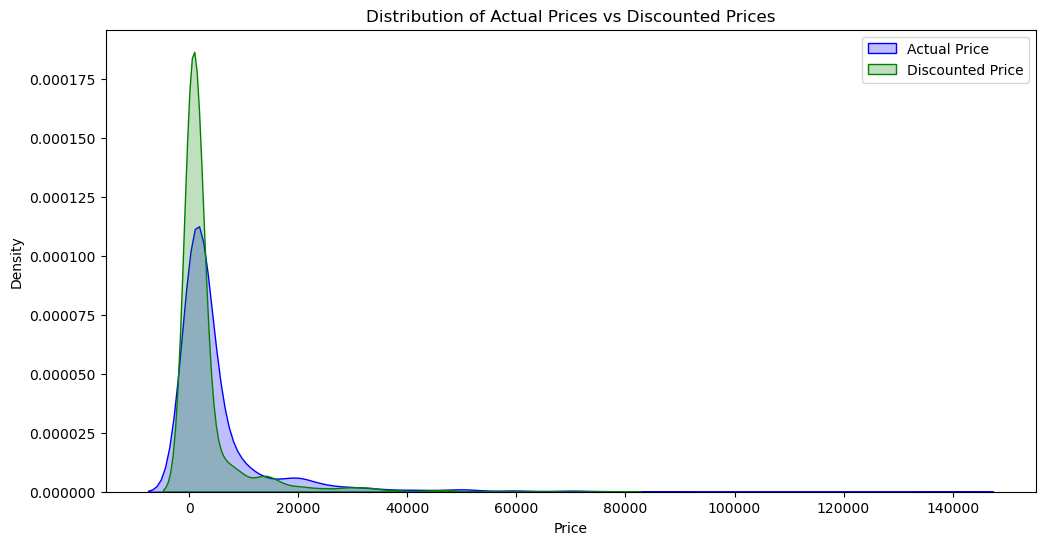

In [155]:
# Plot the distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(dis_vs_act_price['actual_price'], label='Actual Price', shade=True, color='blue')
sns.kdeplot(dis_vs_act_price['discounted_price'], label='Discounted Price', shade=True, color='green')
plt.title('Distribution of Actual Prices vs Discounted Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

EDA3 Q4 How does the average discount percentage vary across categories

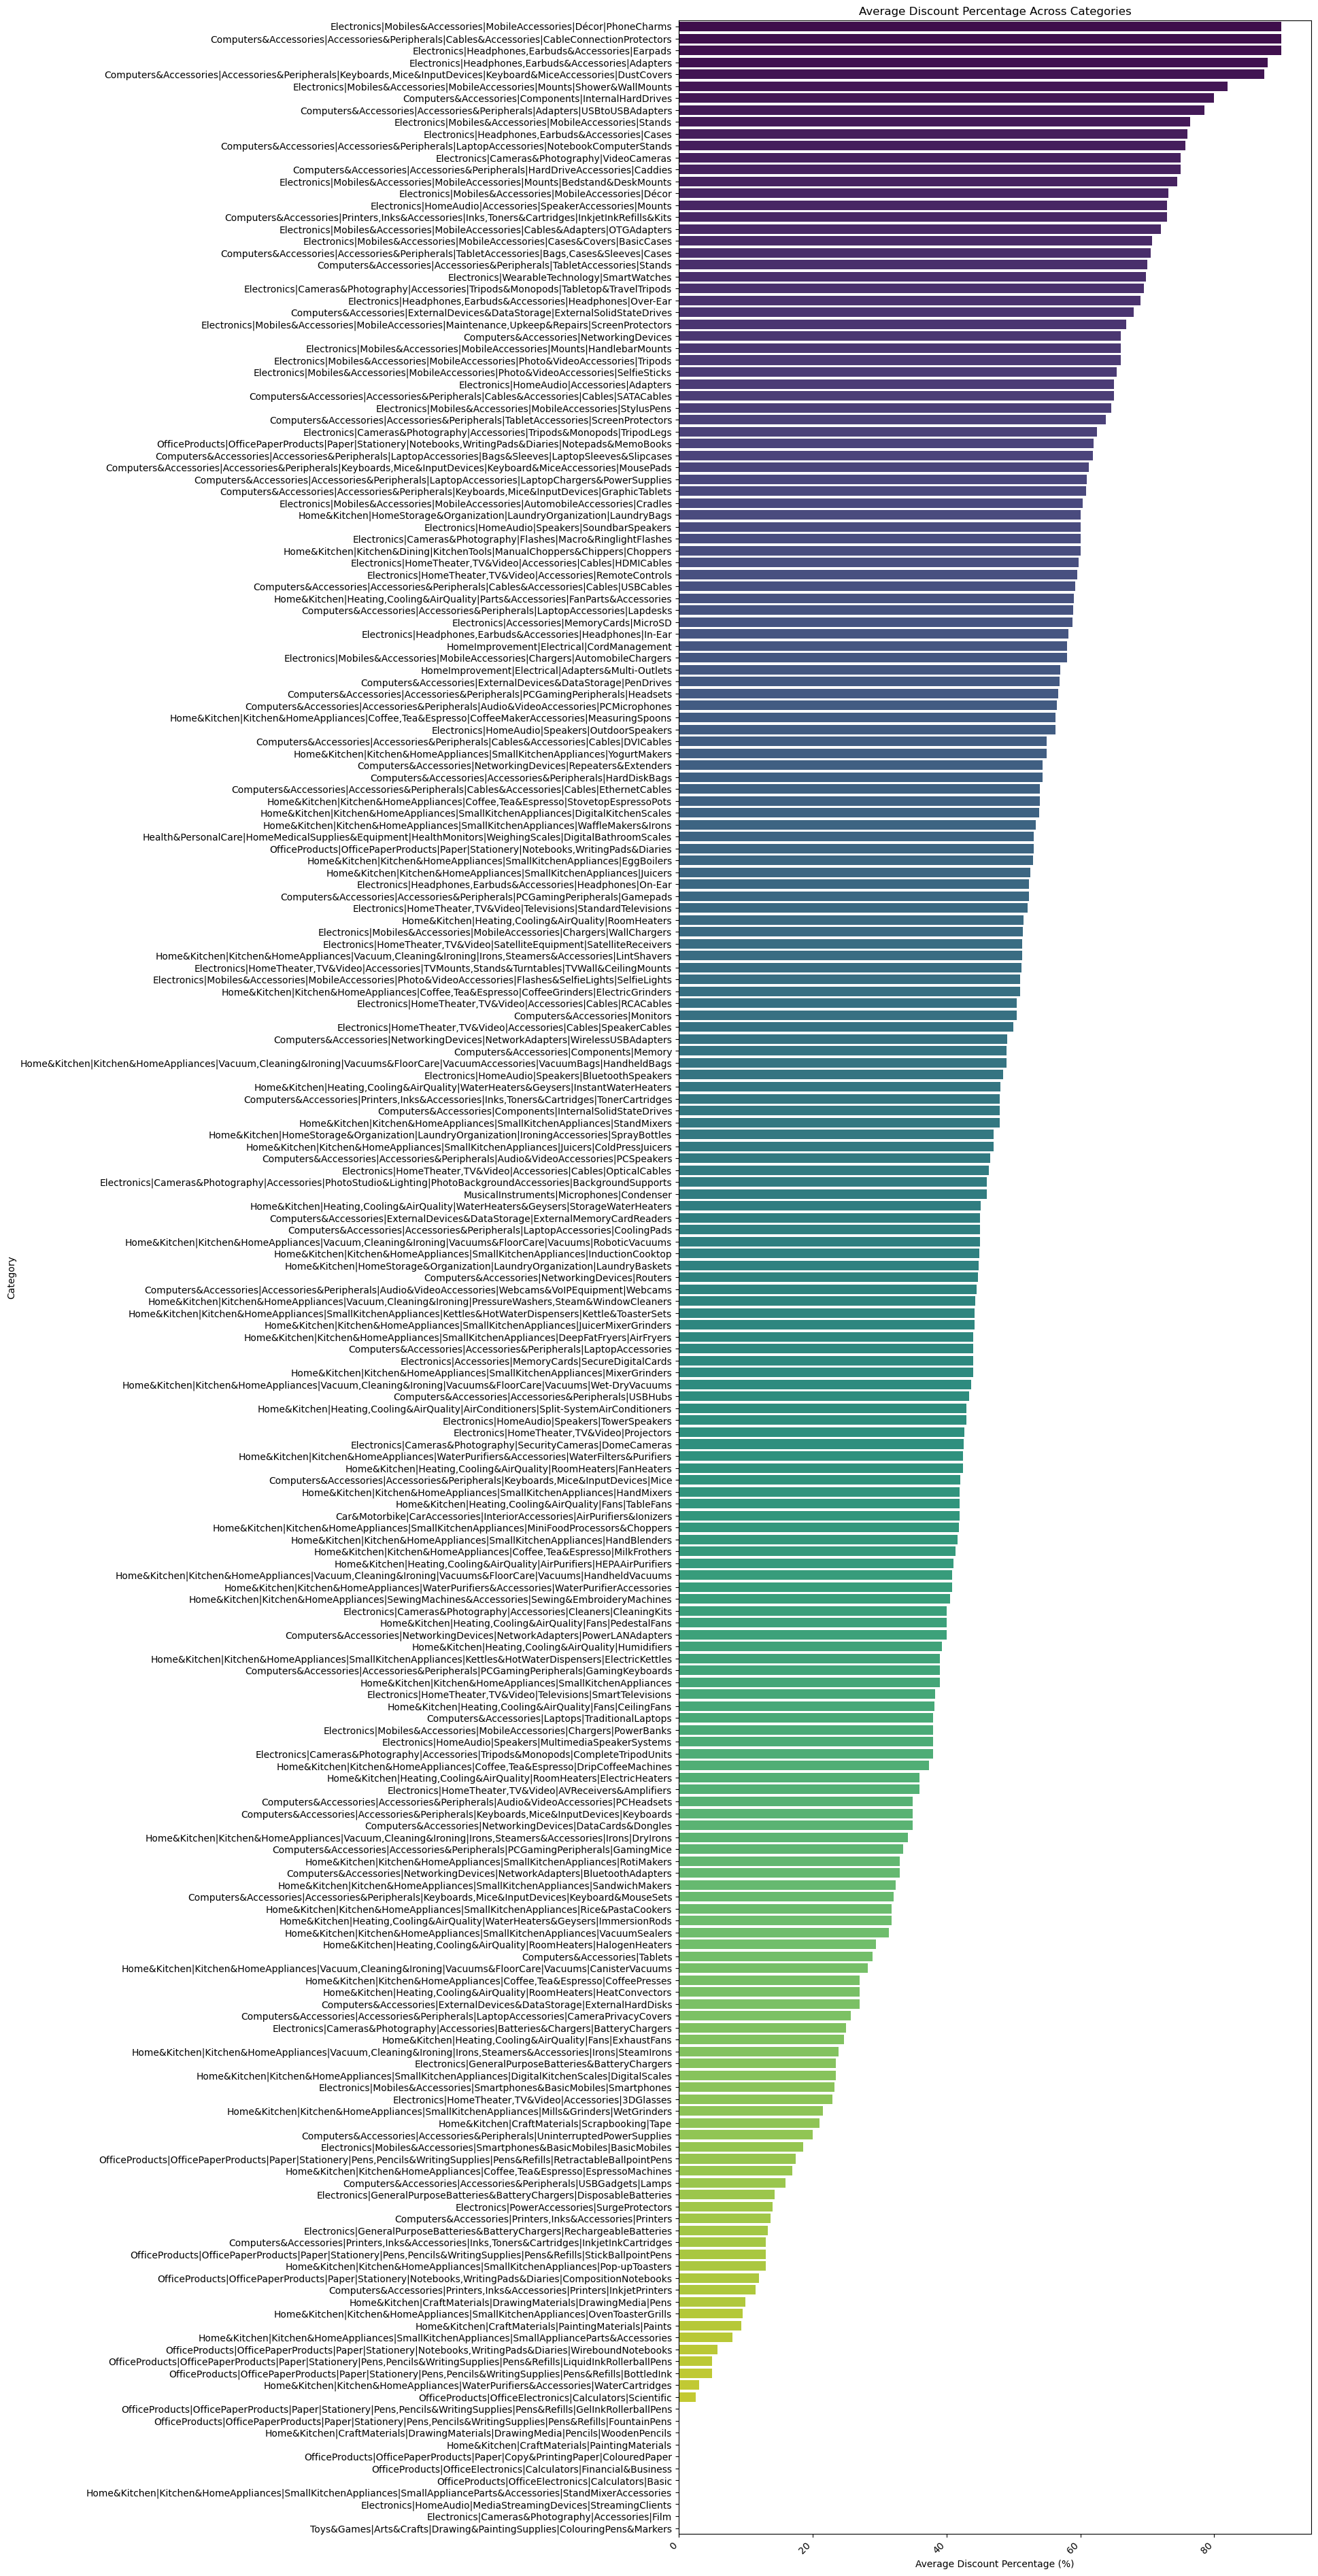

In [164]:
# Group by category and calculate the average discount percentage
category_wise_discount_perc = df.groupby('category')['discount_percentage'].mean().reset_index()

# Sort the categories by average discount percentage
category_wise_discount_perc = category_wise_discount_perc .sort_values(by='discount_percentage', ascending=False)

# Plot the results
plt.figure(figsize=(12, 48))
sns.barplot(category_wise_discount_perc, y='category', x ='discount_percentage', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Discount Percentage Across Categories')
plt.ylabel('Category')
plt.xlabel('Average Discount Percentage (%)')
plt.show()

EDA3 Q5 What are the most popular product names

In [221]:
# Get the top 2 car models with the highest number of sales
most_popular_prod = df1['product_name'].value_counts()[:2]
print (f"\n Most popular two products \n\n {most_popular_prod.reset_index()}")


 Most popular two products 

                                         product_name  count
0  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...      5
1  Fire-Boltt Phoenix Smart Watch with Bluetooth ...      4


EDA3 Q6 What are the most popular product keyword

In [277]:
# Get the top 2 car models with the highest number of sales
most_popular_prod = df1['product_name'].value_counts()[:1]
most_popular_prod = most_popular_prod.reset_index()
b = most_popular_prod['product_name'].values
key_for_most_pop_prod = df1[df1['product_name']==b[0]].index.to_list()
print(f"\n index or key for Most pupular products is \n{key_for_most_pop_prod}")


 index or key for Most pupular products is 
[334, 364, 368, 372, 380]


EDA3 Q7 What are the most popular product reviews

In [284]:
most_popular_revew = df1['review_title'].value_counts()[:5]
most_popular_revew.reset_index()

review_title  count
0  Worked on iPhone 7 and didn’t work on XR,Good ...     10
1  Satisfied,Charging is really fast,Value for mo...      8
2  Phone, camera, heating - works for me, may not...      8
3  Good product,Good one,Nice,Really nice product...      7
4  A Good Braided Cable for Your Type C Device,Go...      7

EDA3 Q8 What is the correlation between discounted_price and rating

In [290]:
df2 = df1[['discounted_price','rating']]
print(f"correlation metrics of'discounted_price' & 'rating'\n{ df2.corr()}")

correlation metrics of'discounted_price' & 'rating'
                  discounted_price    rating
discounted_price          1.000000  0.121132
rating                    0.121132  1.000000


In [318]:
df1['rating'].max()

5.0

EDA3 Q9 What are the Top 5 categories based on the highest ratings

In [25]:
df2 = df1.groupby(['category'])['rating'].max().reset_index()
df3 = df2.sort_values(by = 'rating', ascending = False).reset_index()[:5] 
print(f" Top 5 categories based on the highest ratings are\n\n {df3}")

 Top 5 categories based on the highest ratings are

    index                                           category  rating
0     18  Computers&Accessories|Accessories&Peripherals|...     5.0
1     10  Computers&Accessories|Accessories&Peripherals|...     5.0
2    159  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     4.8
3    140  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...     4.8
4    155  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     4.8


EDA3 Q10  Identify any potential areas for improvement or optimization based on the data analysis

positive correlation between discounted_price and rating indicates, discounted rate for more products may attract more customers 


                                                    EDA 4

Dataset Link: Spotify Data:Popular Hip-Hop Artists and Tracks

Description of the Dataset:

The dataset titled "Spotify Data/ Popu8ar Hip-hop Artists and Tracks" 
provides a curated connection of approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile 
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.each entry not only highlights the popularity and musical composition of the tracks but a8so underscores the creative prowess of the artists and their profound impact on global listeners

Application in Data Science:

This dataset serves as a va8uab8e resource for various data science exp8orations. Ana8ysts can de8ve into trend ana8ysis to discern the popularity dynamics of hit hip-hop trac&s over recent years. Additiona88y, the dataset enab8es networ& ana8ysis to uncover co88aborative patterns among top artists, shedding 8ight on the genre's evo8ving co88aborative landscape. furthermore, it facilitates the development of predictive models aimed at 
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

Column Descriptors:


Artist: The name of the artist, providing direct attribution to the creative mind behind the track.

Track Name: The title of the track, encapsulating its identity and essence.

Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.

Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further exploration.

EDA4 Q1  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
spotify = pd.read_csv('spotify.csv')
df = spotify.copy()

In [40]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [257]:
df.duplicated().sum()

27

In [258]:
df1 = df.drop_duplicates()
df1.reset_index(drop=True,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 16.3+ KB


EDA4 Q2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

In [58]:
popularity_of_track = df1[['Track Name','Popularity']]

In [62]:
popularity_of_track.sort_values(by='Popularity', ascending=False).reset_index(inplace=True)

In [63]:
popularity_of_track

Track Name  Popularity
0              Rich Baby Daddy (feat. Sexyy Red & SZA)          92
1                                            One Dance          91
2                                   IDGAF (feat. Yeat)          90
3                 First Person Shooter (feat. J. Cole)          88
4                        Jimmy Cooks (feat. 21 Savage)          88
..                                                 ...         ...
408                                       Stand United          54
409                     Tip Toe (feat. French Montana)          65
410                     All The Way Up (feat. Infared)          64
411  Work REMIX (feat. A$AP Rocky, French Montana, ...          69
412                Another One Of Me (feat. 21 Savage)          65

[413 rows x 2 columns]

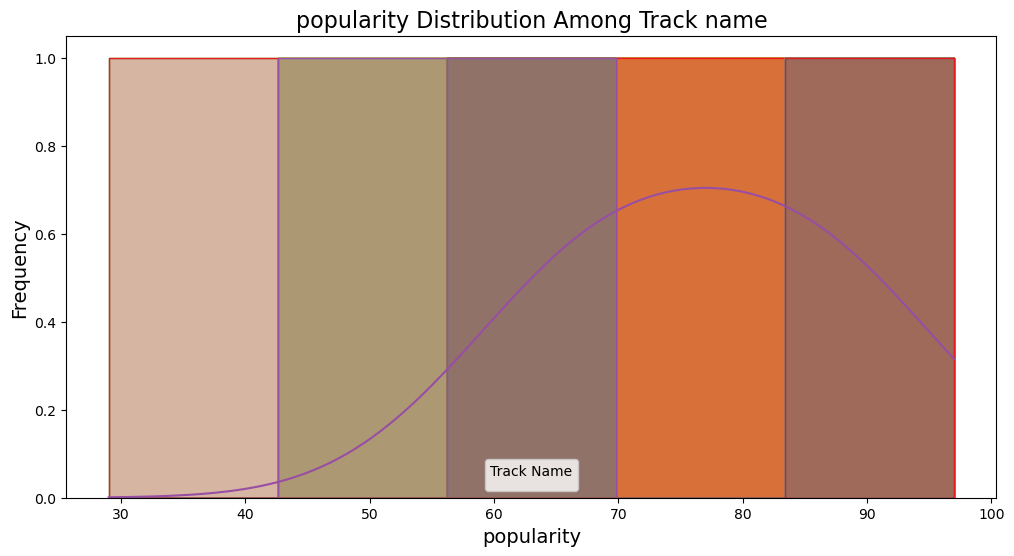

In [74]:
# Plot histogram of popularity  for each track name
plt.figure(figsize=(12, 6))
sns.histplot(data=popularity_of_track, x='Popularity', hue='Track Name', kde=True, palette='Set1', bins=5, element='step')

plt.title('popularity Distribution Among Track name', fontsize=16)
plt.xlabel('popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Track Name', fontsize=10)
plt.show()

EDA4 Q3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

In [77]:
Popularity_vs_Duration = df1[['Track Name','Popularity','Duration (ms)']]
Popularity_vs_Duration.sort_values(by='Popularity', ascending=False).reset_index(inplace=True)
Popularity_vs_Duration

Track Name  Popularity  \
0              Rich Baby Daddy (feat. Sexyy Red & SZA)          92   
1                                            One Dance          91   
2                                   IDGAF (feat. Yeat)          90   
3                 First Person Shooter (feat. J. Cole)          88   
4                        Jimmy Cooks (feat. 21 Savage)          88   
..                                                 ...         ...   
408                                       Stand United          54   
409                     Tip Toe (feat. French Montana)          65   
410                     All The Way Up (feat. Infared)          64   
411  Work REMIX (feat. A$AP Rocky, French Montana, ...          69   
412                Another One Of Me (feat. 21 Savage)          65   

     Duration (ms)  
0           319191  
1           173986  
2           260111  
3           247444  
4           218364  
..             ...  
408         163971  
409         187521  
410         191900  
411         283693  
412         220408  

[413 rows x 3 columns]

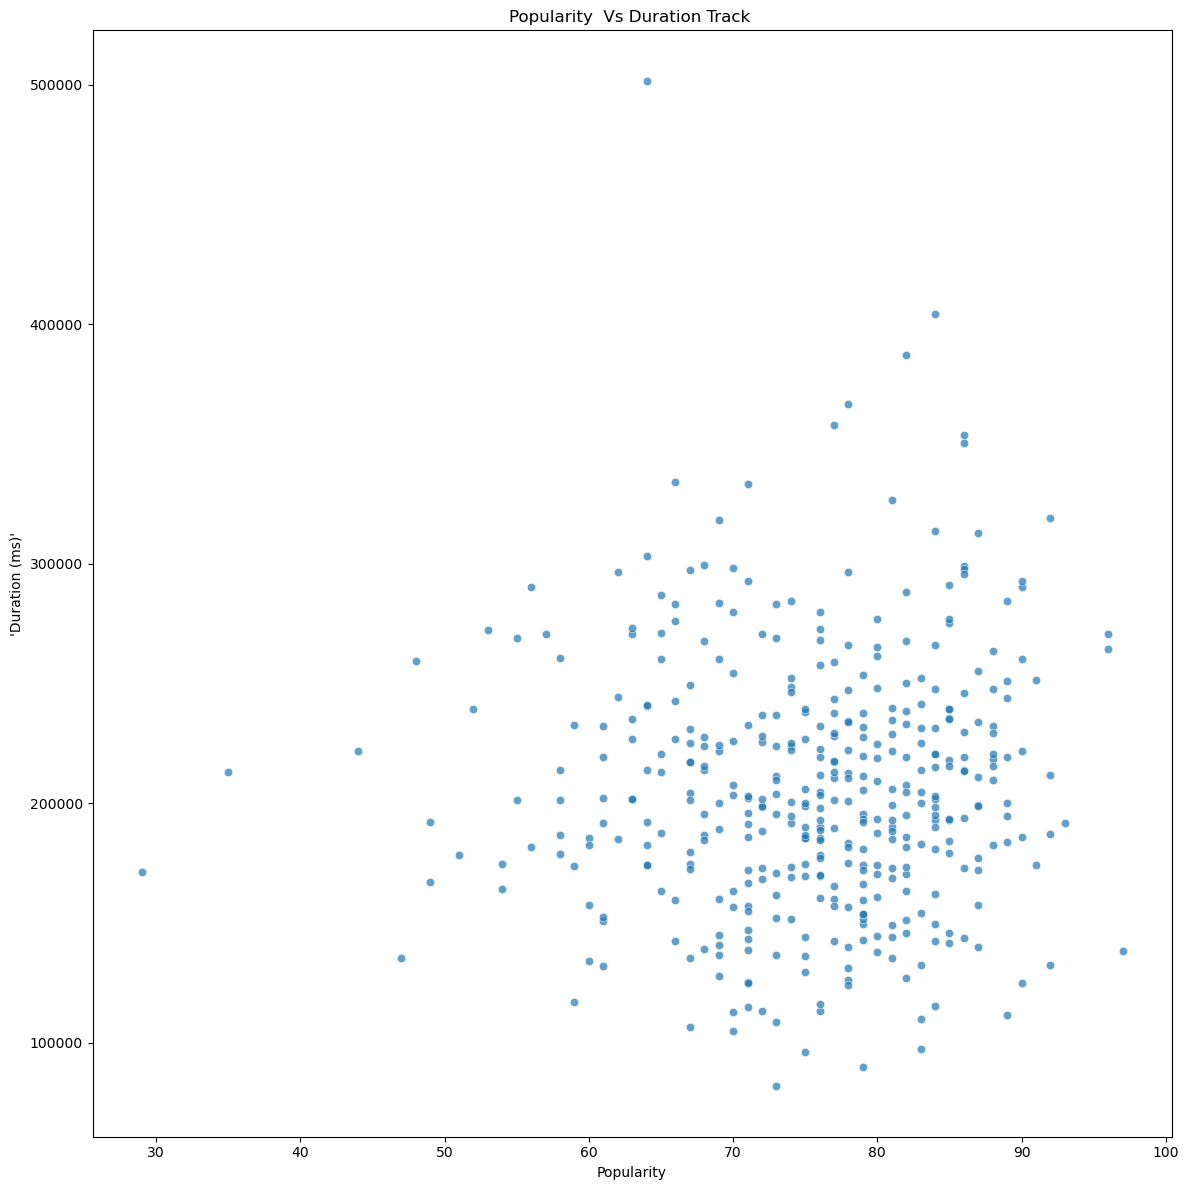

In [87]:
# Plot price vs. engine size for different colors
plt.figure(figsize=(12,12))
sns.scatterplot(data=Popularity_vs_Duration, y='Duration (ms)', x='Popularity', palette="tab10", alpha=0.7)
plt.title("Popularity  Vs Duration of Track ")
plt.ylabel("Duration (ms)")
plt.xlabel('Popularity')
plt.tight_layout()
plt.show()

There is no sinificant relationship between pupularity and duration of track

EDA4 Q4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

In [64]:
artist_track =df1[['Track Name','Artist']]
artist_track

Track Name          Artist
0              Rich Baby Daddy (feat. Sexyy Red & SZA)           Drake
1                                            One Dance           Drake
2                                   IDGAF (feat. Yeat)           Drake
3                 First Person Shooter (feat. J. Cole)           Drake
4                        Jimmy Cooks (feat. 21 Savage)           Drake
..                                                 ...             ...
408                                       Stand United  French Montana
409                     Tip Toe (feat. French Montana)    Jason Derulo
410                     All The Way Up (feat. Infared)         Fat Joe
411  Work REMIX (feat. A$AP Rocky, French Montana, ...       A$AP Ferg
412                Another One Of Me (feat. 21 Savage)           Diddy

[413 rows x 2 columns]

In [63]:
artist_and_track_count = artist_track['Artist'].value_counts().reset_index()
artist_and_track_count

Artist  count
0             Drake     17
1            Eminem     11
2          Flo Rida     10
3          Ludacris     10
4         Timbaland     10
..              ...    ...
110  Arizona Zervas      1
111   Fivio Foreign      1
112          Pressa      1
113    David Guetta      1
114           Diddy      1

[115 rows x 2 columns]

artist 'Drake' has highest '17' number of 'tracks' in the dataset

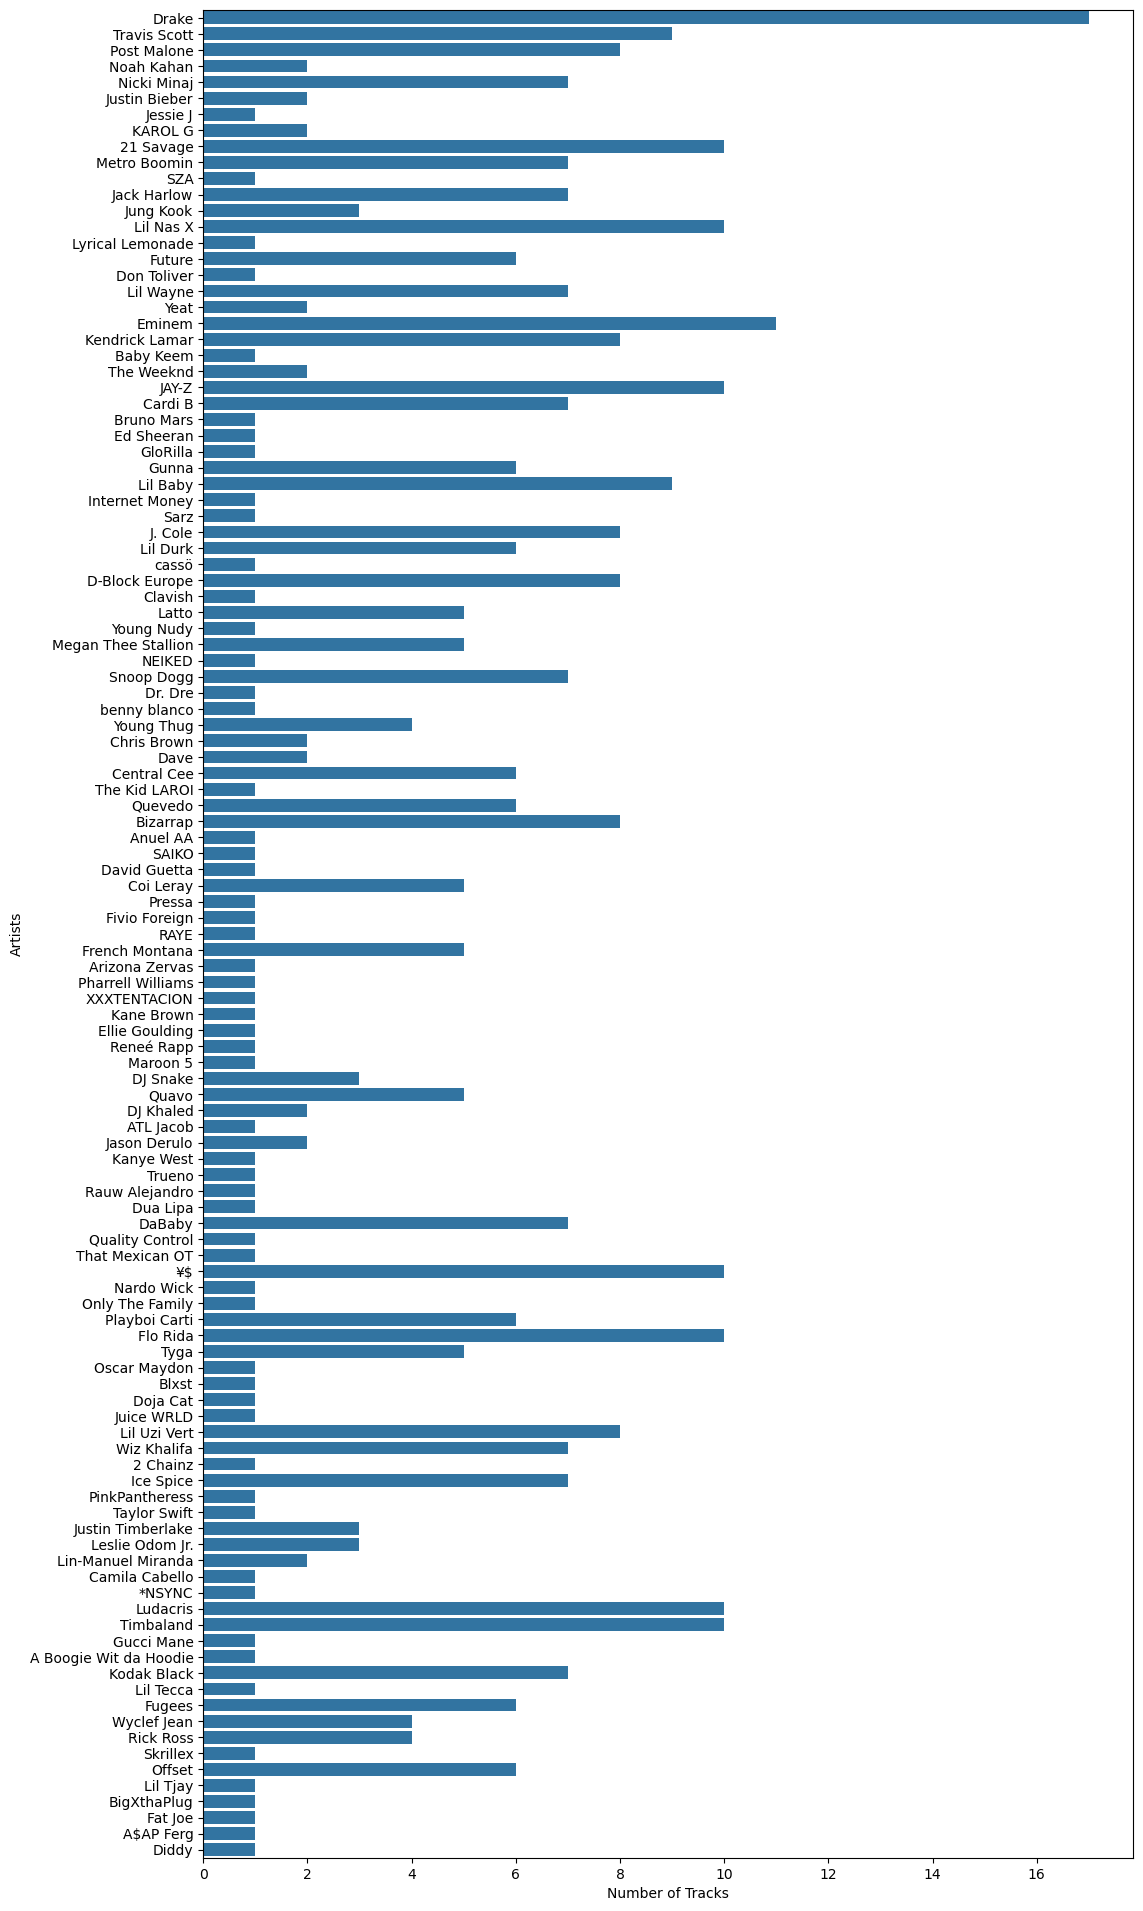

In [73]:
plt.figure(figsize=(12,24))
sns.countplot(data = artist_track, y='Artist')
plt.ylabel('Artists')
plt.xlabel('Number of Tracks')
plt.show()

EDA4 Q5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [84]:
pupularity_of_Track = df1[['Artist','Track Name','Popularity']].sort_values(by = 'Popularity',ascending= True)[0:5]

print(f"\n  Top 5 least pupular Tracks and its Artists are \n\n { pupularity_of_Track }")


  Top 5 least pupular Tracks and its Artists are 

              Artist                     Track Name  Popularity
199          Pressa  Attachments (feat. Coi Leray)          29
219   Justin Bieber                     Intentions          35
390  French Montana                Splash Brothers          44
213        Lil Baby                  On Me - Remix          47
384     Wyclef Jean      911 (feat. Mary J. Blige)          48


EDA4 Q6 Among the top 5 most popular artists, which artist has the highest popularity on average?
         Calculate and display the average popularity for each artist

In [242]:
pupularity_of_artist = df1[['Artist','Popularity']].sort_values(by = 'Popularity',ascending= False)

avg_pupularity_of_artist = pupularity_of_artist.groupby('Artist')['Popularity'].mean().reset_index()
avg_pupularity_of_artist1 = avg_pupularity_of_artist.rename(columns = {'Artist':'artists', 'Popularity':'avg_popularity'})
sorted_avg_pupularity_of_artist = avg_pupularity_of_artist1.sort_values(by = 'avg_popularity', ascending=False)
sorted_avg_pupularity_of_artist.reset_index(inplace=True)
print(f"\n Average popularity of each Artist :\n\n {sorted_avg_pupularity_of_artist}")
print(f"\n Top 5 Artist with high average pupularity:\n\n {sorted_avg_pupularity_of_artist.loc[0:5]}")
print(f"\n Top most Artist with high average pupularity:\n\n {sorted_avg_pupularity_of_artist.loc[0:0]}")


 Average popularity of each Artist :

      index         artists  avg_popularity
0      113           cassö       92.000000
1      104          Trueno       89.000000
2       24    David Guetta       87.000000
3      103    Travis Scott       86.555556
4      114              ¥$       85.100000
..     ...             ...             ...
110     89            RAYE       55.000000
111    107     Wyclef Jean       54.500000
112      7  Arizona Zervas       54.000000
113     52   Justin Bieber       49.000000
114     85          Pressa       29.000000

[115 rows x 3 columns]

 Top 5 Artist with high average pupularity:

    index       artists  avg_popularity
0    113         cassö       92.000000
1    104        Trueno       89.000000
2     24  David Guetta       87.000000
3    103  Travis Scott       86.555556
4    114            ¥$       85.100000
5     84   Post Malone       85.000000

 Top most Artist with high average pupularity:

    index artists  avg_popularity
0    113   cassö 

EDA4 Q7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [256]:
pupularity_of_artist = df1[['Artist','Popularity']].sort_values(by = 'Popularity',ascending= False)
avg_pupularity_of_artist = pupularity_of_artist.groupby('Artist')['Popularity'].mean().reset_index()
avg_pupularity_of_artist.columns=['artists','avg_popularity']
sorted_avg_pupularity_of_artist = avg_pupularity_of_artist1.sort_values(by = 'avg_popularity', ascending=False)
sorted_avg_pupularity_of_artist.reset_index(inplace=True)
top_5_popular_artist = sorted_avg_pupularity_of_artist.loc[:4]
print(f" Top 5 artist with highest average popularity \n\n {top_5_popular_artist}")
top_5_popular_artist['artists'].to_list()
print("\n Track Name of top 5 popular artists\n")
df1.loc[df1['Artist'].isin(top_5_popular_artist['artists'].to_list()),['Artist','Track Name']]

 Top 5 artist with highest average popularity 

    index       artists  avg_popularity
0    113         cassö       92.000000
1    104        Trueno       89.000000
2     24  David Guetta       87.000000
3    103  Travis Scott       86.555556
4    114            ¥$       85.100000

 Track Name of top 5 popular artists



Artist                                    Track Name
7    Travis Scott                        MELTDOWN (feat. Drake)
30   Travis Scott                    FE!N (feat. Playboi Carti)
31   Travis Scott                                      I KNOW ?
32   Travis Scott                                       MY EYES
33   Travis Scott                                    goosebumps
37   Travis Scott                                    SICKO MODE
38   Travis Scott              TELEKINESIS (feat. SZA & Future)
134         cassö                                         Prada
166  Travis Scott                     SKITZO (feat. Young Thug)
192  David Guetta                            Baby Don't Hurt Me
205  Travis Scott  CIRCUS MAXIMUS (feat. The Weeknd & Swae Lee)
229        Trueno                  Mamichula - con Nicki Nicole
247            ¥$                                      CARNIVAL
248            ¥$                                          BURN
249            ¥$                                      FUK SUMN
250            ¥$                                    BACK TO ME
251            ¥$                                         STARS
252            ¥$                                         DO IT
253            ¥$                                       TALKING
254            ¥$                                          PAID
255            ¥$                                     PAPERWORK
256            ¥$                                      VULTURES

In [ ]:
EDA4 Q8 Visualize relationships between multiple numerical variables simultaneously using a pair plot

<Figure size 1200x1200 with 0 Axes>

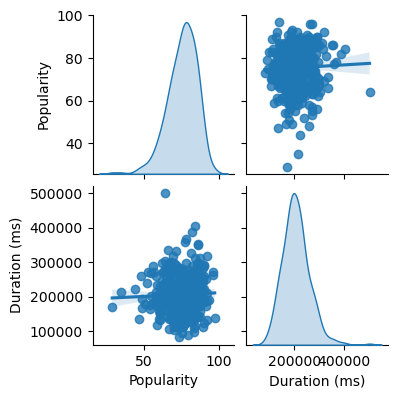

In [263]:
plt.figure(figsize=(12, 12))
sns.pairplot(df1, kind='reg', diag_kind='kde', height=2)
plt.show()

EDA4 Q9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
         violin plot

In [264]:
artist_vs_duration = df1[['Artist','Duration (ms)']]
artist_vs_duration

Artist  Duration (ms)
0             Drake         319191
1             Drake         173986
2             Drake         260111
3             Drake         247444
4             Drake         218364
..              ...            ...
408  French Montana         163971
409    Jason Derulo         187521
410         Fat Joe         191900
411       A$AP Ferg         283693
412           Diddy         220408

[413 rows x 2 columns]

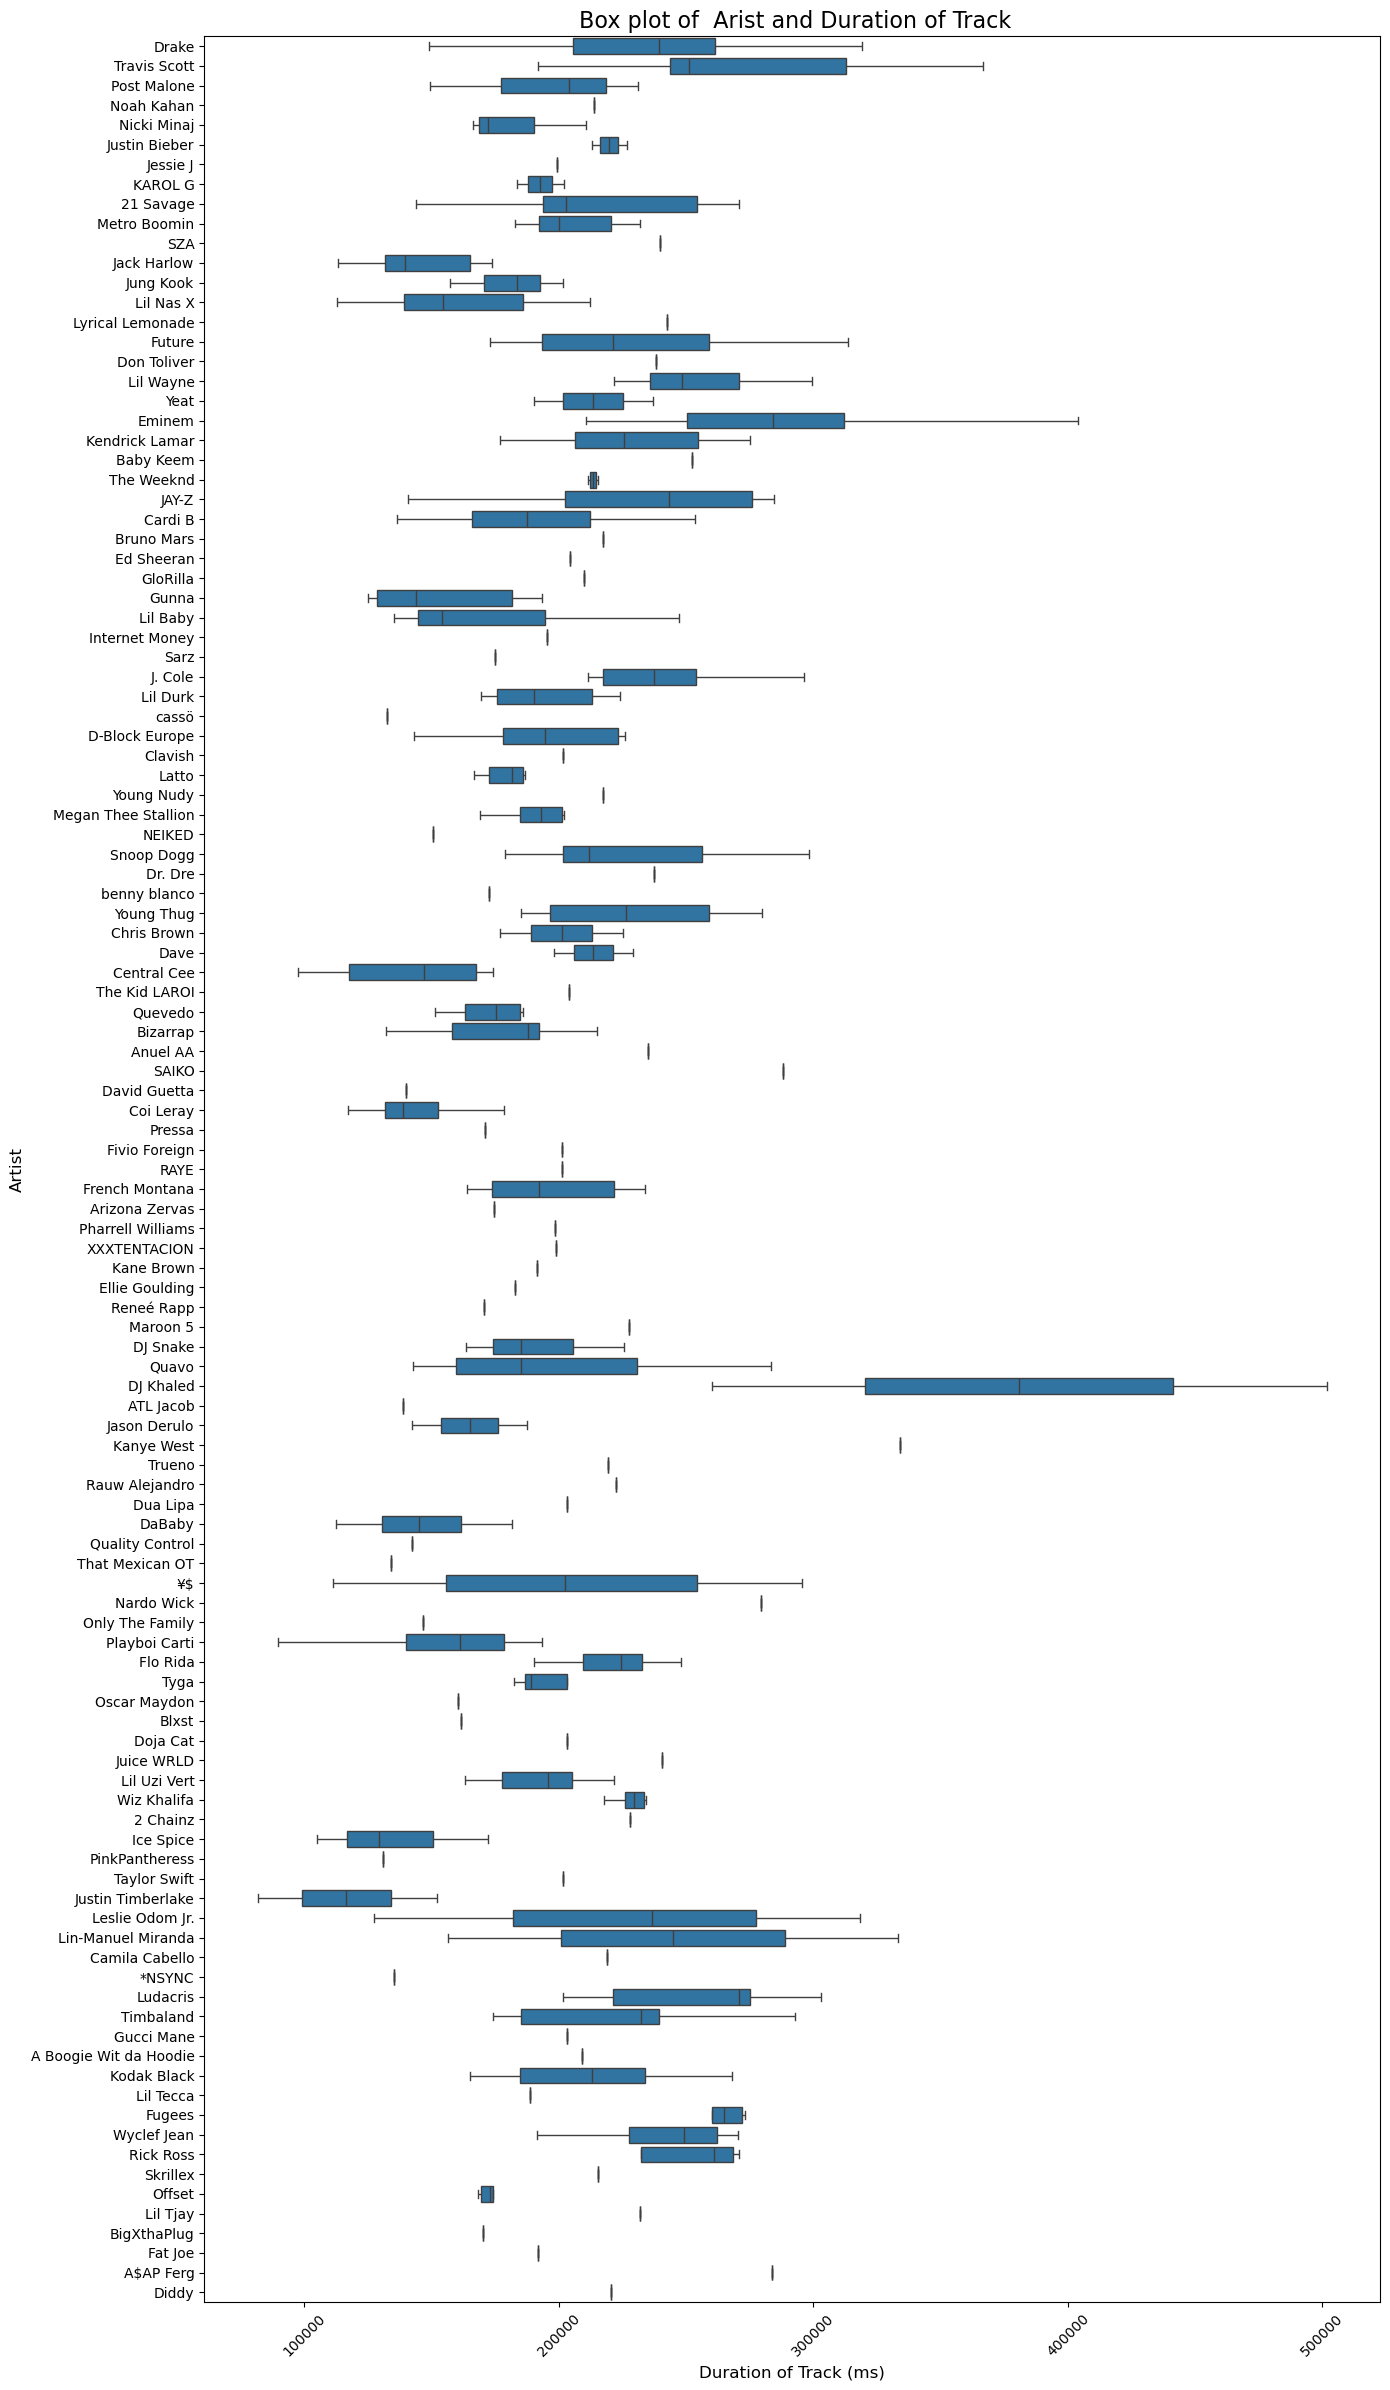

In [271]:
plt.figure(figsize=(14, 24))
sns.boxplot(data=artist_vs_duration, x= 'Duration (ms)', y = 'Artist', showfliers=False)  # Exclude outliers for better visualization
plt.title(' Box plot of  Arist and Duration of Track', fontsize=16)
plt.xlabel('Duration of Track (ms)', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()

From the above plot we can see that duration of tracks signnificantly vary across differant artists

EDA4 Q10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
       violin plot.

In [288]:
artist_vs_Pupularity = df1[['Artist','Popularity']]
artist_vs_Pupularity
df1.loc[df1['Artist']=='¥$'][['Popularity','Track Name']]

Popularity  Track Name
247          96    CARNIVAL
248          89        BURN
249          88    FUK SUMN
250          86  BACK TO ME
251          84       STARS
252          83       DO IT
253          81     TALKING
254          82        PAID
255          82   PAPERWORK
256          80    VULTURES

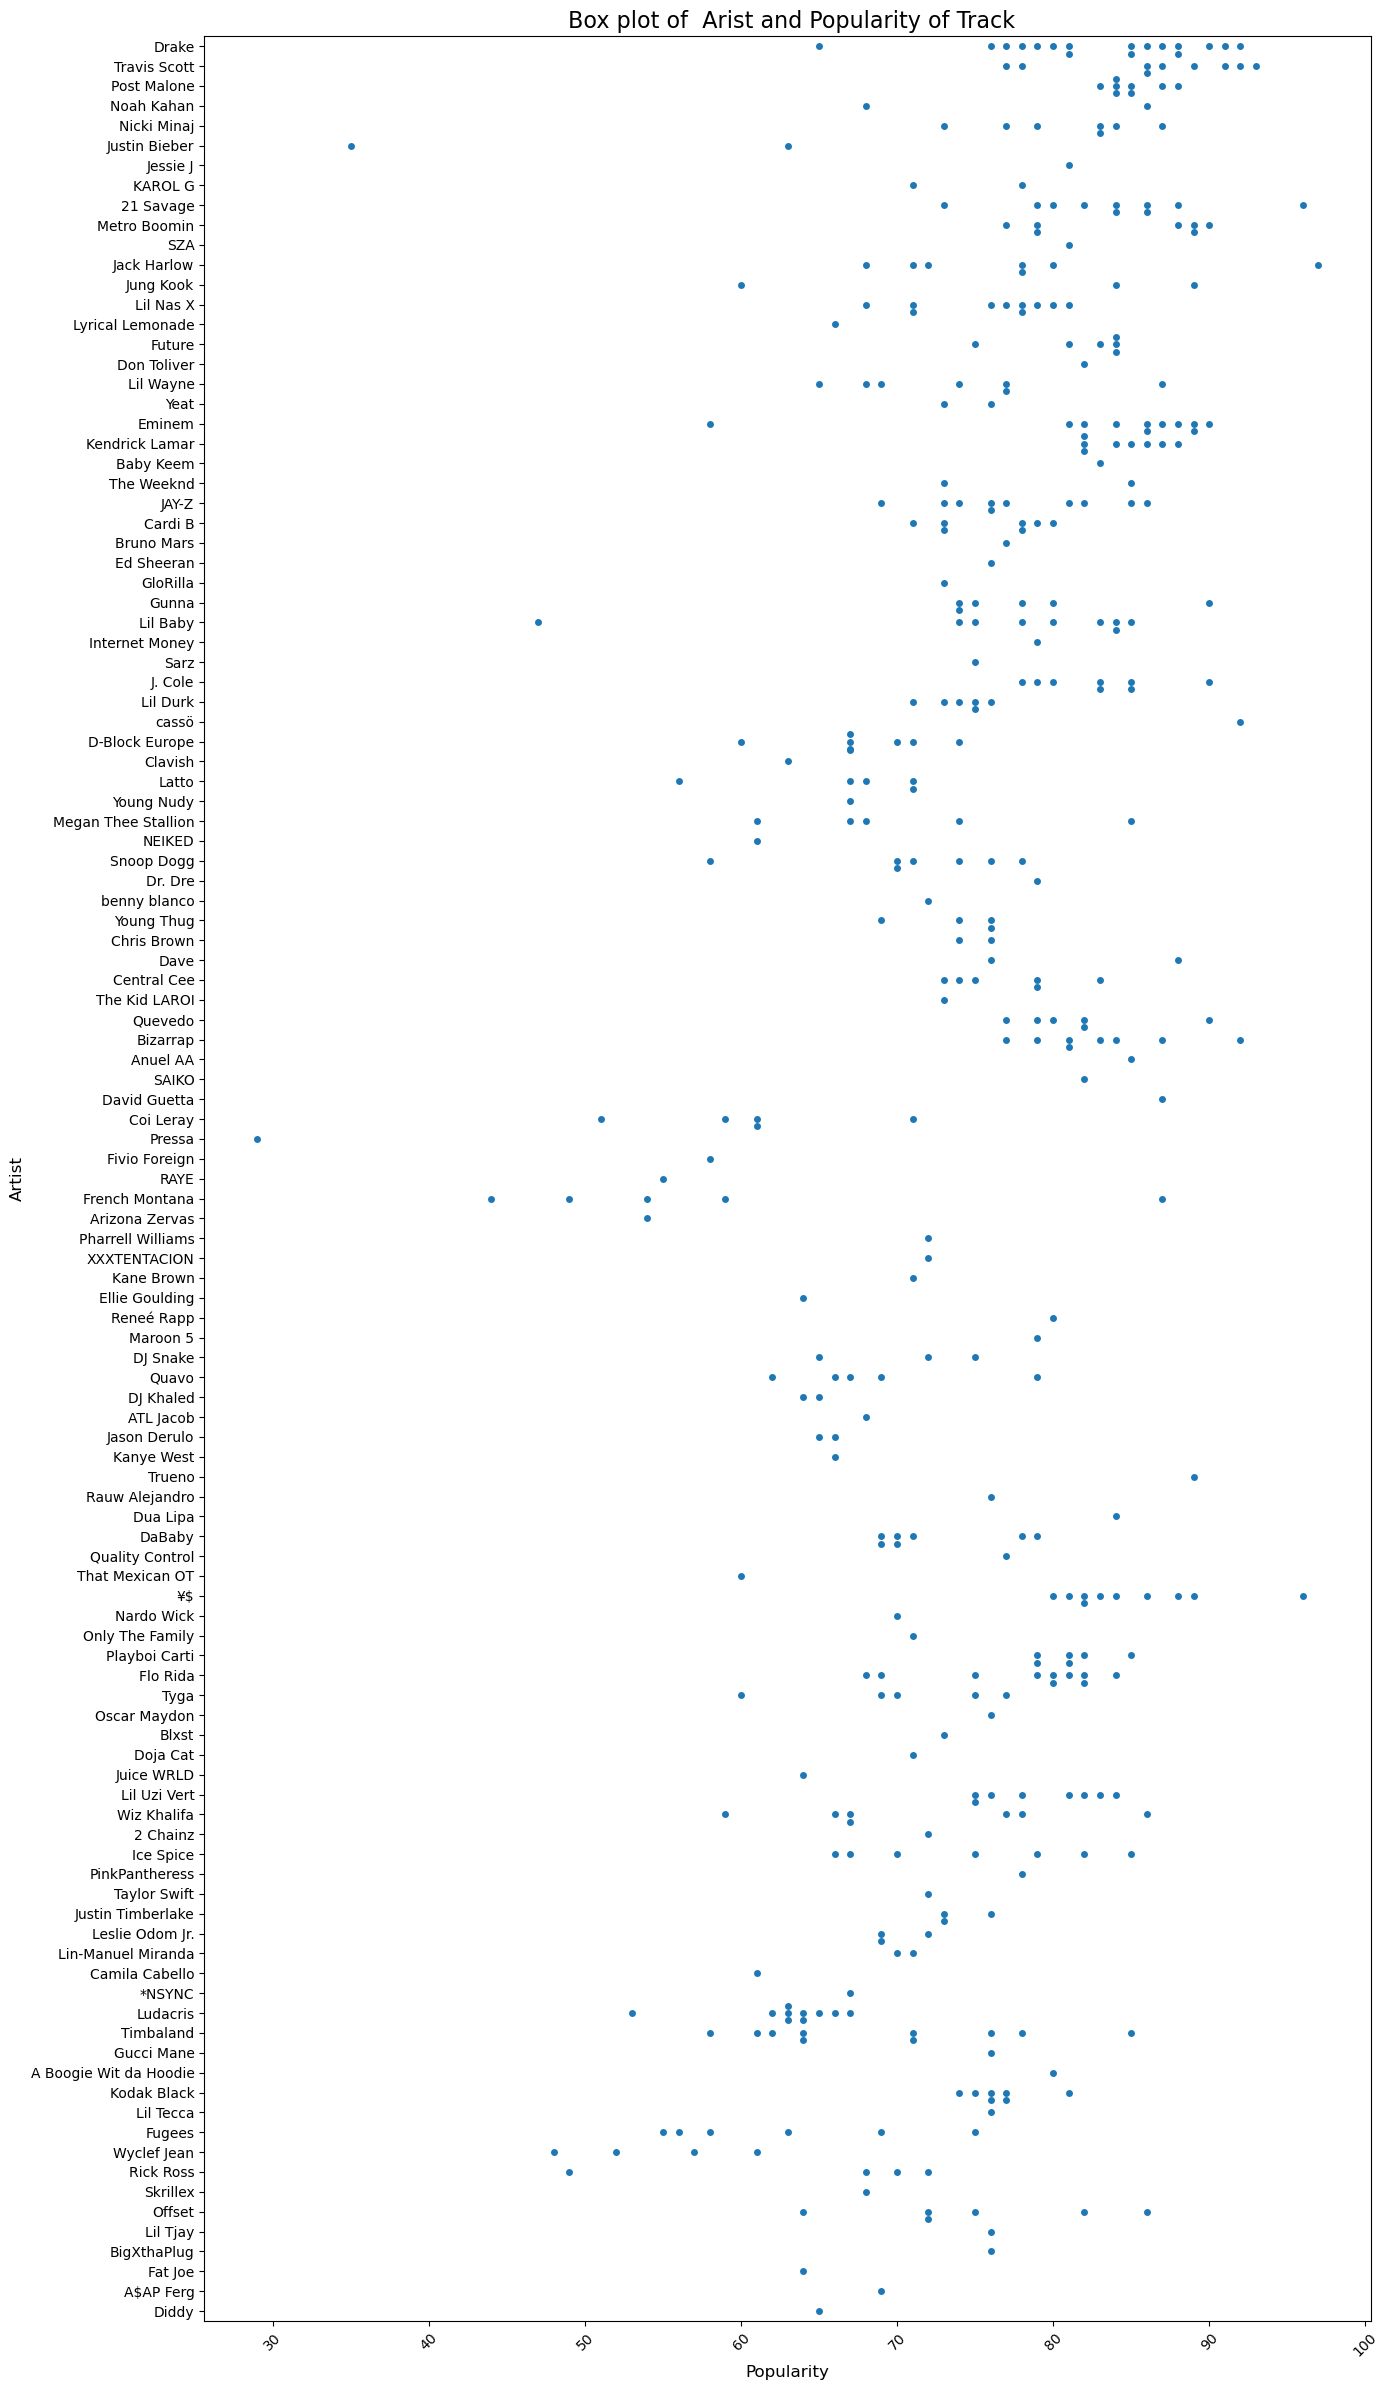

In [290]:
plt.figure(figsize=(14, 24))
sns.swarmplot(data = artist_vs_Pupularity, x= 'Popularity', y = 'Artist')  # Exclude outliers for better visualization
plt.title(' Box plot of  Arist and Popularity of Track', fontsize=16)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()